<a href="https://colab.research.google.com/github/EduardoFoncescaFinardi/DA_IA_IOT/blob/main/CP2_att.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DICIONARIO**


totalAtivo - O ativo total de uma empresa é a soma de todos os seus ativos, ou seja, seus bens e direitos. Dessa forma, inclui o ativo circulante, realizável a longo prazo e permanente, também chamado de não circulante. A definição de ativo na contabilidade é o conjunto de bens e direitos da organização.



In [1]:
# Ignorar warnings
import warnings
warnings.filterwarnings("ignore")

# Bibliotecas para uso e visualização de dados
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Import para divisão dos dados de treino e teste
from sklearn.model_selection import train_test_split

# Imports para preparação de dados
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


# Import de métricas para avaliação dos modelos
from sklearn.metrics import accuracy_score


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

url = "/content/drive/MyDrive/solicitacoescredito.csv"
df = pd.read_csv(url)
df_sub = df[["faturamentoBruto", "duplicatasAReceber", "estoque", "totalAtivo", "passivoCirculante", "ativoCirculante", "empresa_MeEppMei"]]




FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/solicitacoescredito.csv'

In [ ]:
df_filtrado = df_sub.dropna()

In [ ]:
df_filtrado.head(8)

,faturamentoBruto,duplicatasAReceber,estoque,totalAtivo,passivoCirculante,ativoCirculante,empresa_MeEppMei
4,40779757.0,11797928.0,3047791.0,25793410.0,12149031.0,14758917.0,False
7,11958227.0,3742963.0,11902384.0,19415777.0,2538069.0,17801610.0,False
8,72479551.0,15980275.0,11420388.0,39455945.0,13843198.0,36827690.0,False
10,4575646.0,973971.0,942096.0,3609498.0,704245.0,2127907.0,True
11,13871246.0,115000.0,1693990.0,5595689.0,6118711.0,5369982.0,False
14,36783195.0,6873822.0,2017848.0,12582116.0,11680162.0,11780048.0,False
15,538430217.0,116371889.0,42968287.0,218446735.0,107180320.0,198271531.0,True
16,538430217.0,116371889.0,42968287.0,218446735.0,107180320.0,198271531.0,False


In [ ]:
df_filtrado.head()

,faturamentoBruto,duplicatasAReceber,estoque,totalAtivo,passivoCirculante,ativoCirculante,empresa_MeEppMei
4,40779757.0,11797928.0,3047791.0,25793410.0,12149031.0,14758917.0,False
7,11958227.0,3742963.0,11902384.0,19415777.0,2538069.0,17801610.0,False
8,72479551.0,15980275.0,11420388.0,39455945.0,13843198.0,36827690.0,False
10,4575646.0,973971.0,942096.0,3609498.0,704245.0,2127907.0,True
11,13871246.0,115000.0,1693990.0,5595689.0,6118711.0,5369982.0,False


In [ ]:
df_filtrado.isnull().sum()

faturamentoBruto      0
duplicatasAReceber    0
estoque               0
totalAtivo            0
passivoCirculante     0
ativoCirculante       0
empresa_MeEppMei      0
dtype: int64

In [ ]:
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4731 entries, 4 to 8963
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   faturamentoBruto    4731 non-null   float64
 1   duplicatasAReceber  4731 non-null   float64
 2   estoque             4731 non-null   float64
 3   totalAtivo          4731 non-null   float64
 4   passivoCirculante   4731 non-null   float64
 5   ativoCirculante     4731 non-null   float64
 6   empresa_MeEppMei    4731 non-null   object 
dtypes: float64(6), object(1)
memory usage: 295.7+ KB


In [ ]:
df_filtrado.describe()

,faturamentoBruto,duplicatasAReceber,estoque,totalAtivo,passivoCirculante,ativoCirculante
count,4.731000e+03,4.731000e+03,4.731000e+03,4.731000e+03,4.731000e+03,4.731000e+03
mean,8.930243e+07,1.664082e+07,1.524385e+07,7.076202e+07,3.397849e+07,4.452599e+07
std,4.351357e+08,2.979657e+08,8.385534e+07,8.880759e+08,4.947117e+08,4.675516e+08
min,0.000000e+00,-2.278071e+07,-2.632260e+05,-1.700000e+01,-1.134941e+06,-1.700000e+01
25%,2.222863e+06,3.920500e+04,1.712860e+05,1.049740e+06,1.825725e+05,8.875850e+05
50%,7.969110e+06,1.088164e+06,1.063783e+06,4.637565e+06,1.332062e+06,3.996630e+06
75%,3.075236e+07,6.576243e+06,5.493839e+06,1.919923e+07,7.440425e+06,1.636435e+07
max,6.426115e+09,2.009358e+10,1.293428e+09,5.482350e+10,2.750382e+10,2.903832e+10


In [ ]:
df_filtrado.nunique()
#df_filtrado.drop_duplicates(inplace=True)

faturamentoBruto      2231
duplicatasAReceber    1668
estoque               1674
totalAtivo            1788
passivoCirculante     1789
ativoCirculante       1794
empresa_MeEppMei         2
dtype: int64

In [ ]:
df= df.drop(columns=["razaoSocial", "nomeFantasia", "cnpjSemTraco", "status", "primeiraCompra", "intervaloFundacao","dataAprovadoNivelAnalista", "definicaoRisco", "restricoes", "periodoBalanco", "dataAprovadoEmComite", "anoFundacao"])
#df_filtrado = df_filtrado.drop(columns=["razaoSocial"])


In [ ]:
#correlation_matrix = df_filtrado.corr()
correlation_matrix = df_sub.corr()

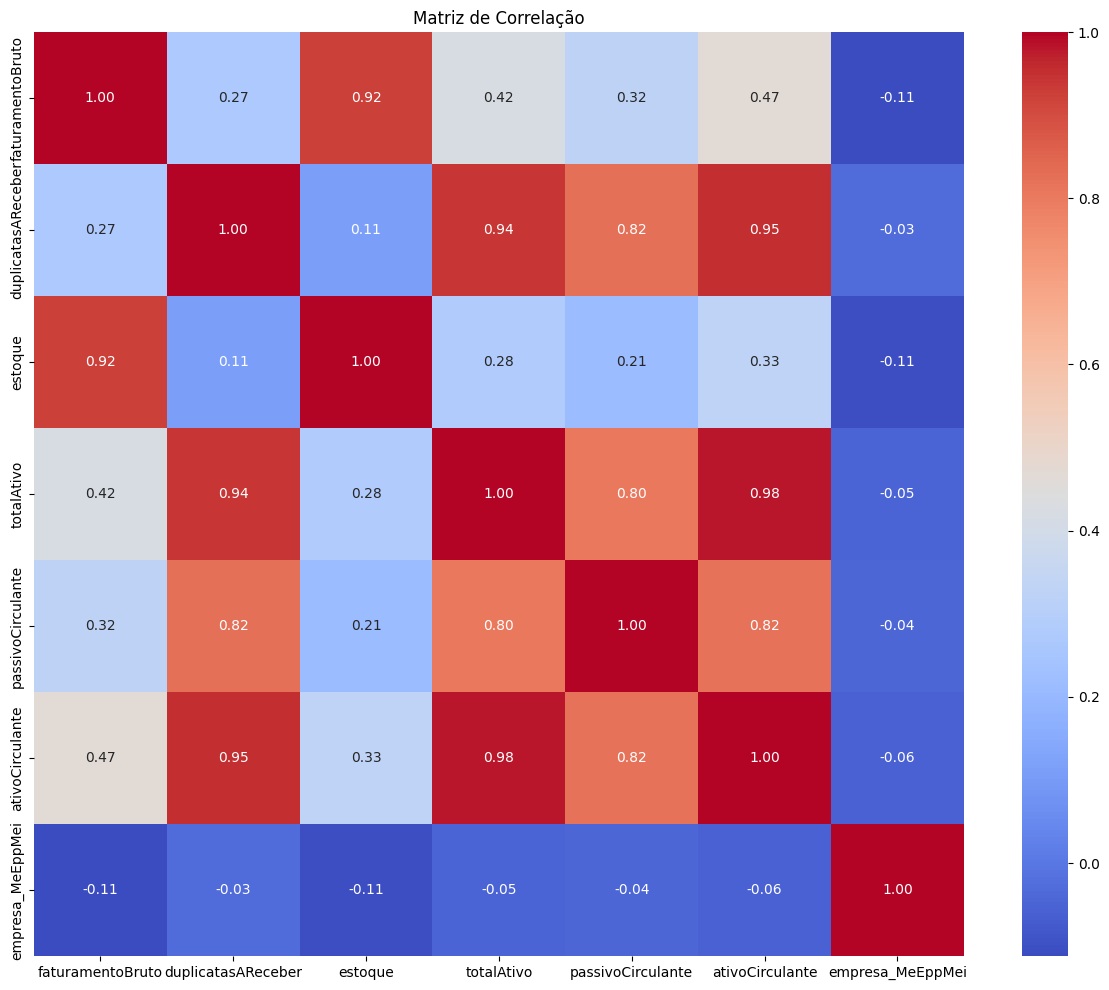

In [ ]:
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()

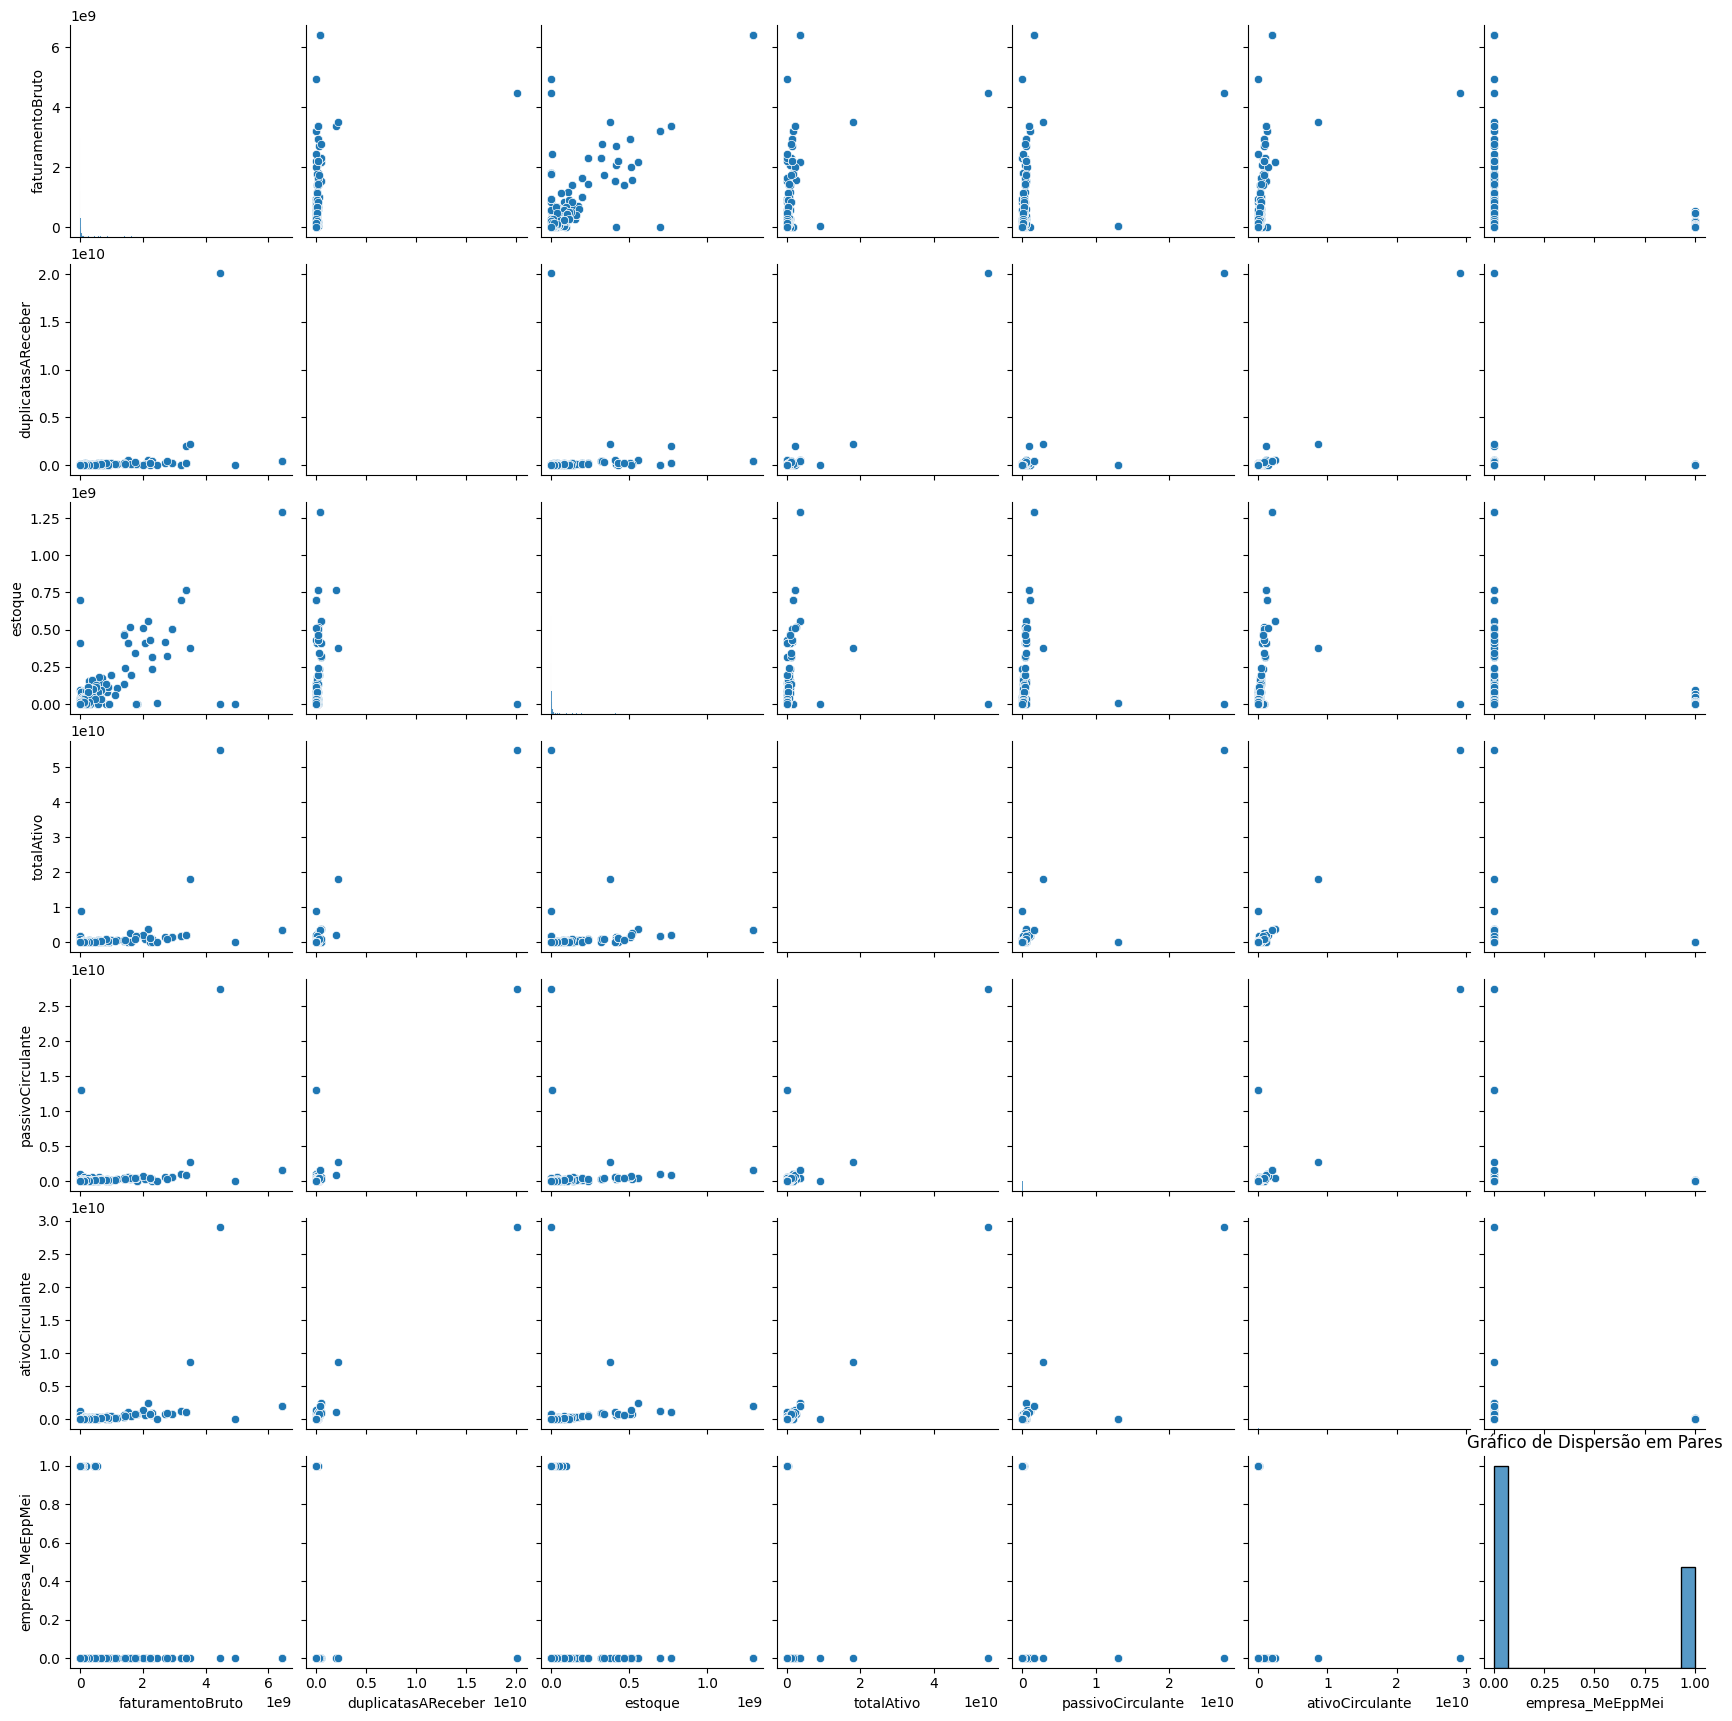

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Gráfico de dispersão em pares
sns.pairplot(df_filtrado)
plt.title('Gráfico de Dispersão em Pares')
plt.show()

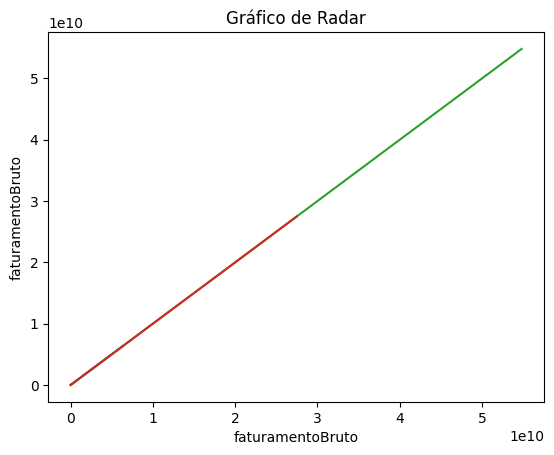

In [ ]:
# Gráfico de radar
variables = ['faturamentoBruto', 'endividamento', 'totalAtivo', 'passivoCirculante']
for variable in variables:
   sns.lineplot(data=df, x=variable, y=variable)
plt.title('Gráfico de Radar')
plt.show()

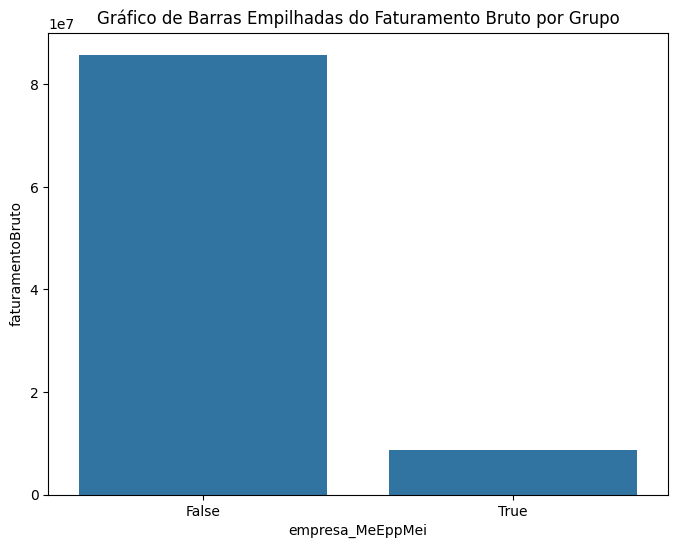

In [ ]:
# Gráfico de barras empilhadas
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='empresa_MeEppMei', y='faturamentoBruto', ci=None)
plt.title('Gráfico de Barras Empilhadas do Faturamento Bruto por Grupo')
plt.show()


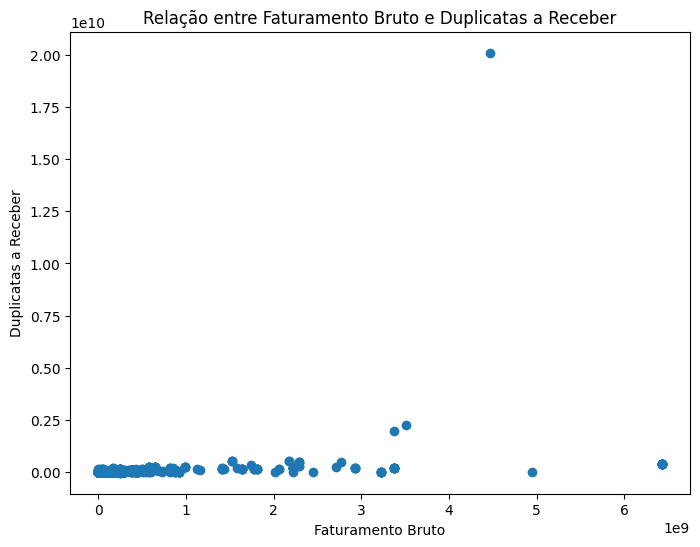

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df_filtrado['faturamentoBruto'], df_filtrado['duplicatasAReceber'])
plt.xlabel('Faturamento Bruto')
plt.ylabel('Duplicatas a Receber')
plt.title('Relação entre Faturamento Bruto e Duplicatas a Receber')
plt.show()

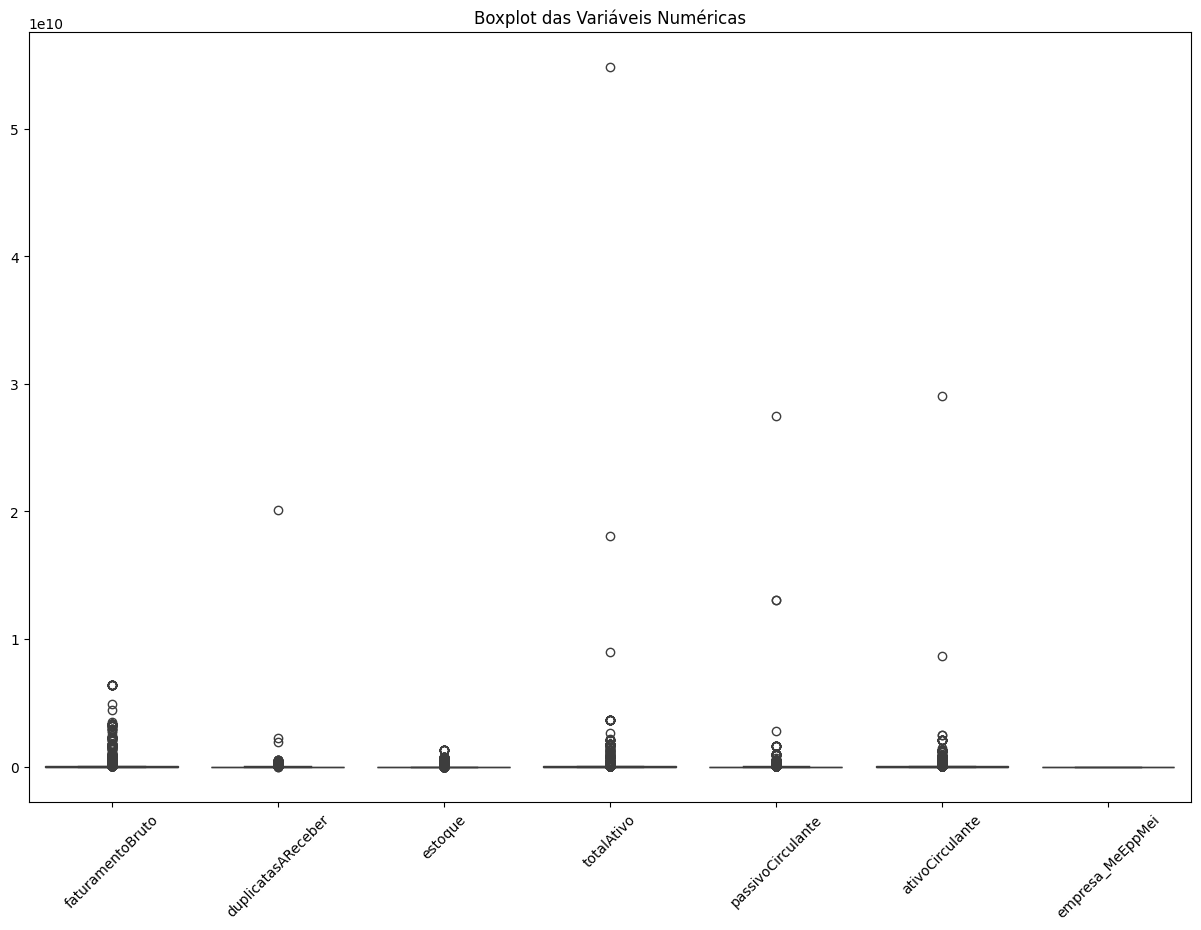

In [ ]:
# Histogramas podem ajudar a entender a distribuição das variáveis numéricas.

plt.figure(figsize=(15, 10))
sns.boxplot(data=df_filtrado)
plt.xticks(rotation=45)
plt.title('Boxplot das Variáveis Numéricas')
plt.show()

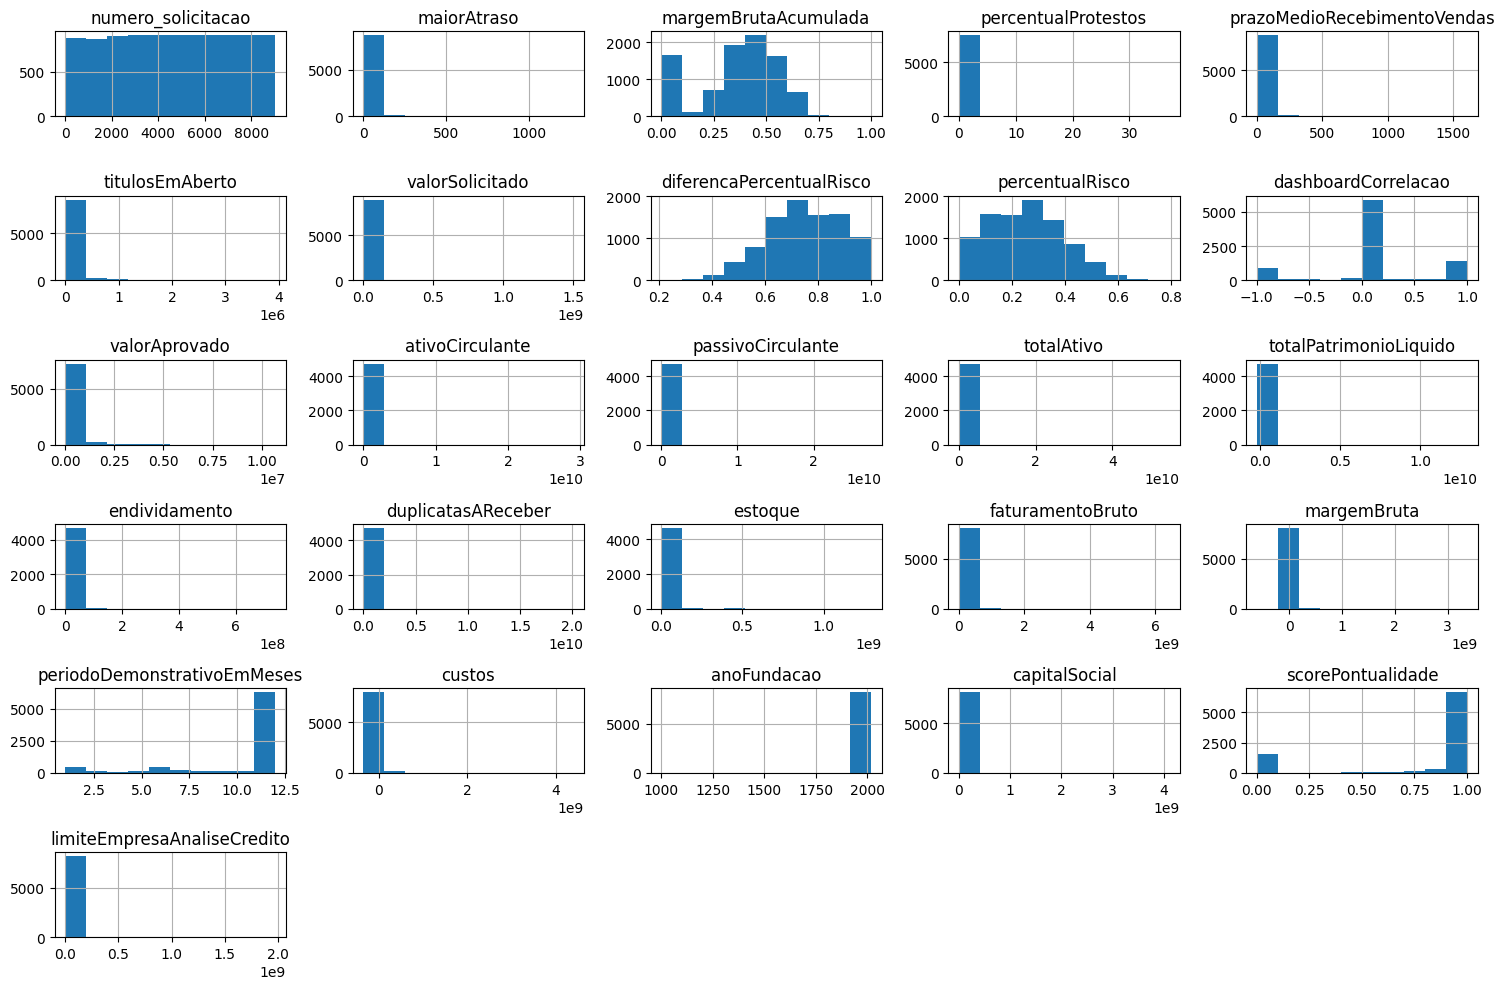

In [ ]:
df.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

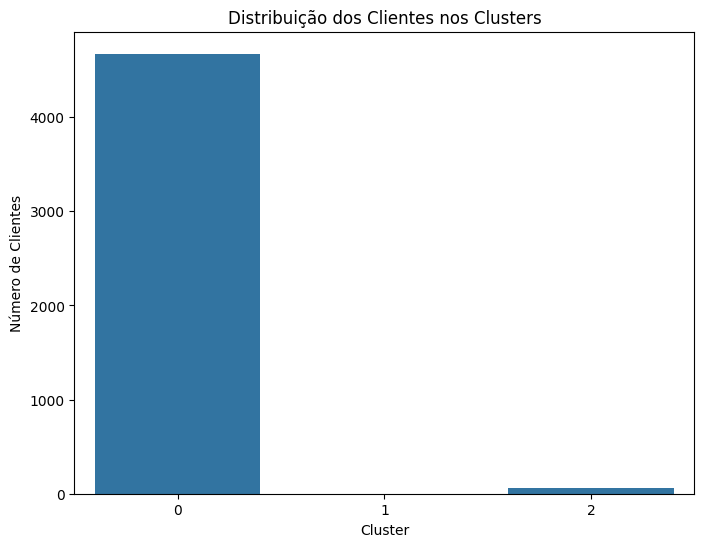

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Pré-processamento de dados
# Suponha que você tenha selecionado apenas as colunas numéricas relevantes para a análise
numeric_columns = ['faturamentoBruto', 'duplicatasAReceber', 'estoque', 'totalAtivo', 'passivoCirculante', 'ativoCirculante']

# Removendo valores ausentes
df.dropna(subset=numeric_columns, inplace=True)

# Normalizando os dados
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[numeric_columns])

# Escolhendo o número de clusters
n_clusters = 3

# Aplicando o algoritmo K-means
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_data)

# Adicionando os rótulos dos clusters ao DataFrame original
df_filtrado['cluster'] = kmeans.labels_

# Visualizando a distribuição dos clientes nos clusters
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='cluster')
plt.title('Distribuição dos Clientes nos Clusters')
plt.xlabel('Cluster')
plt.ylabel('Número de Clientes')
plt.show()



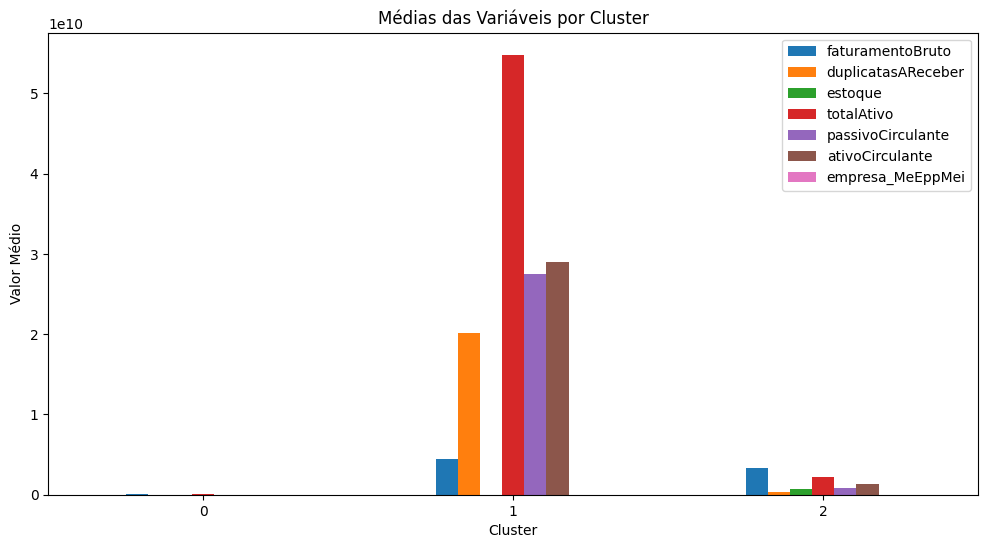

In [ ]:
# Calcular as médias das variáveis numéricas por cluster
cluster_means = df_filtrado.groupby('cluster').mean()

# Plotar gráfico de barras para cada variável por cluster
cluster_means.plot(kind='bar', figsize=(12, 6))
plt.title('Médias das Variáveis por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Valor Médio')
plt.xticks(rotation=0)
plt.show()


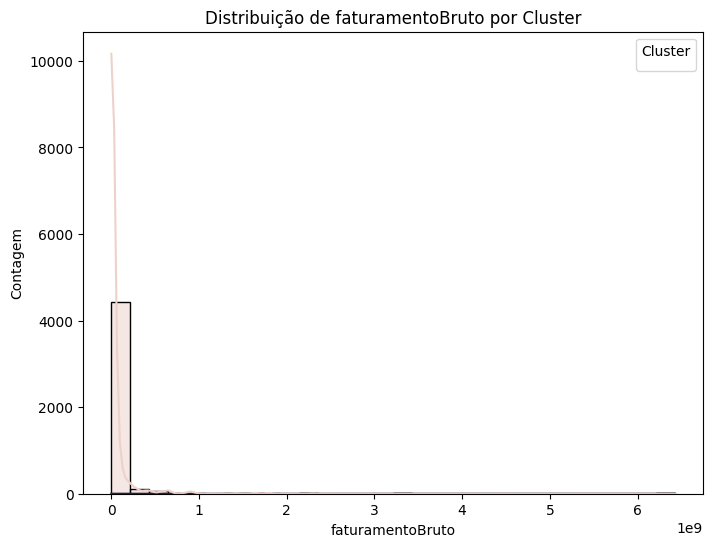

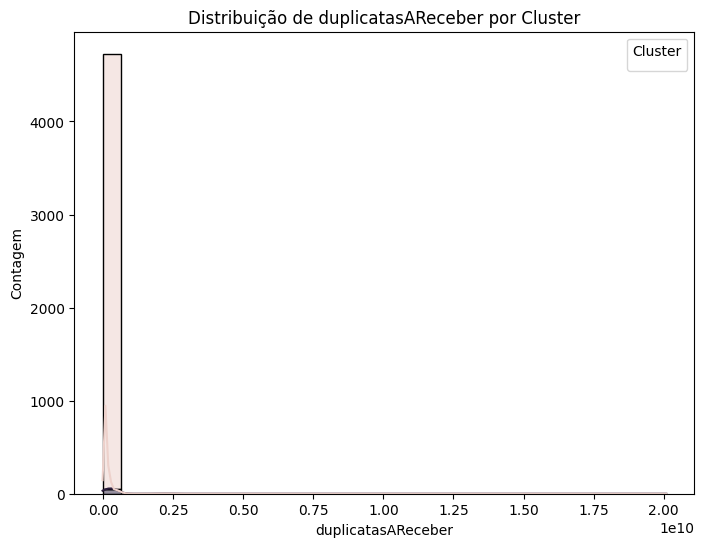

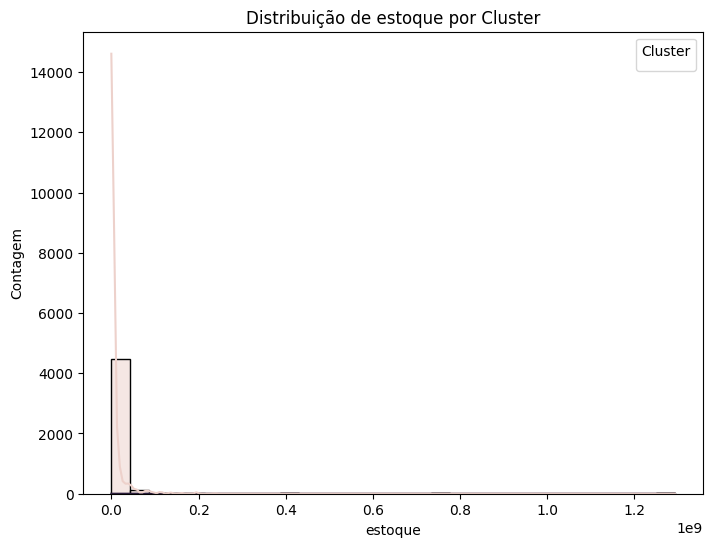

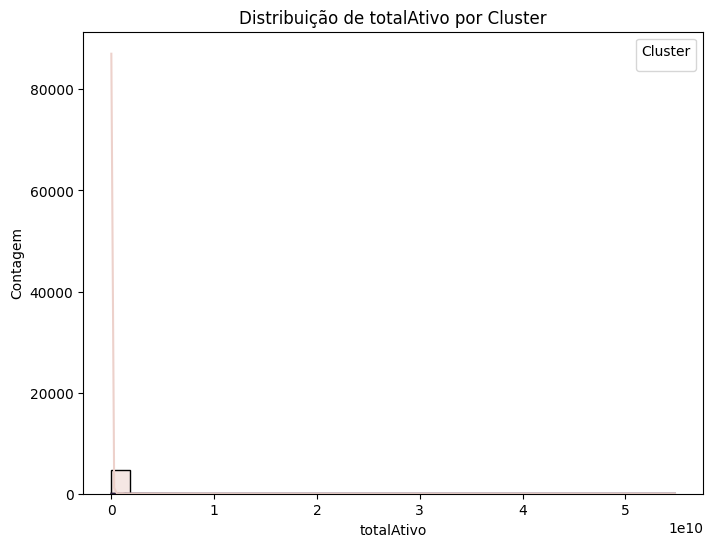

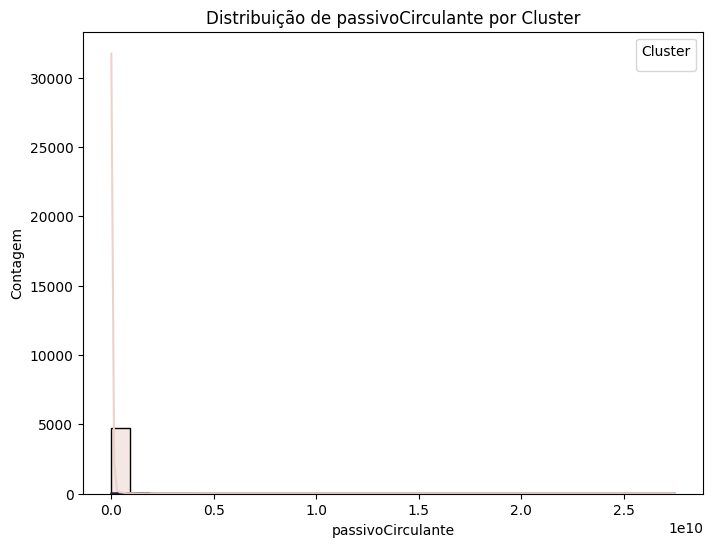

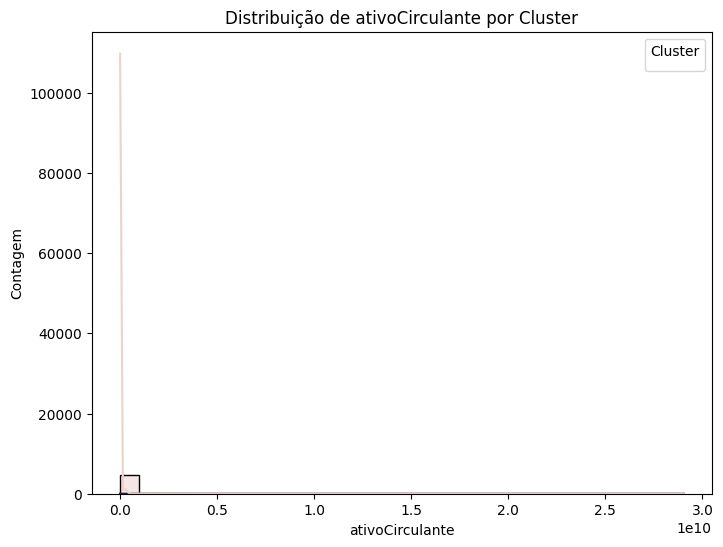

In [ ]:
# Plotar histogramas para cada variável por cluster
for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=column, hue='cluster', multiple='stack', bins=30, kde=True)
    plt.title(f'Distribuição de {column} por Cluster')
    plt.xlabel(column)
    plt.ylabel('Contagem')
    plt.legend(title='Cluster')
    plt.show()


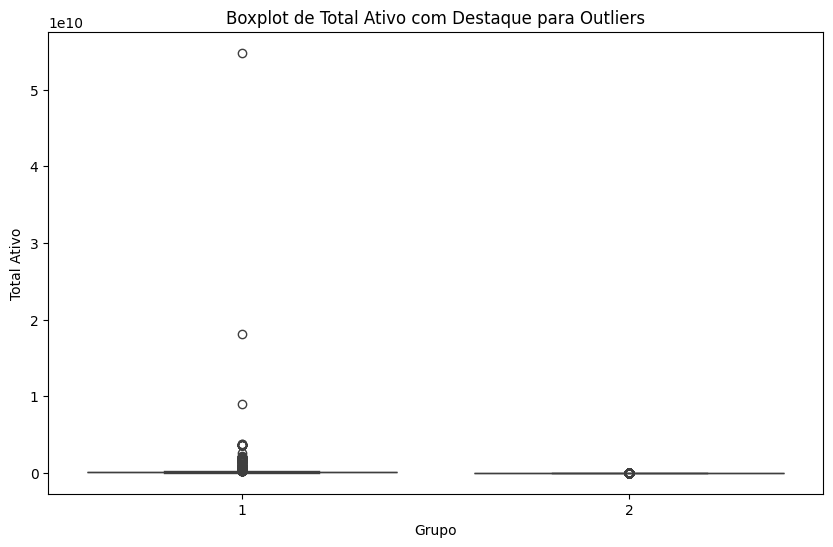

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='grupo', y='totalAtivo')
plt.title('Boxplot de Total Ativo com Destaque para Outliers')
plt.xlabel('Grupo')
plt.ylabel('Total Ativo')
plt.show()


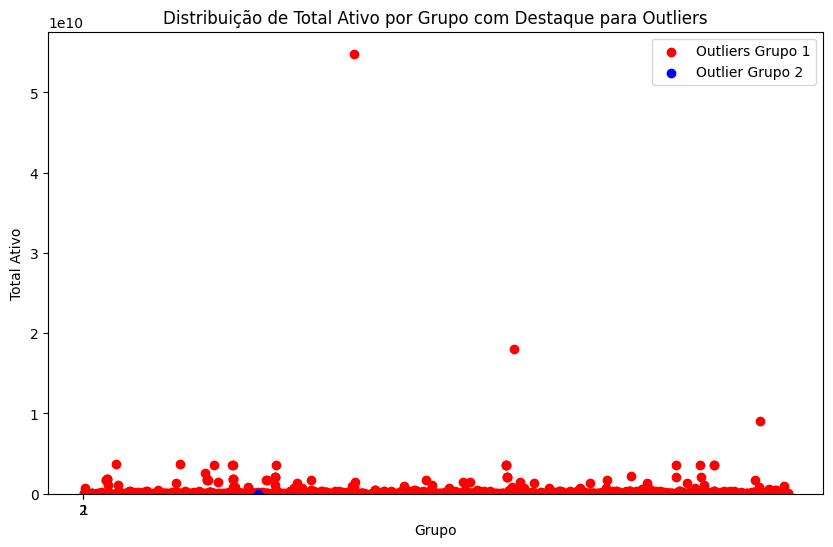

In [ ]:
plt.figure(figsize=(10, 6))

# Plotar gráfico de barras dos grupos
sns.barplot(data=df, x='grupo', y='totalAtivo', ci=None)

# Adicionar marcadores para os outliers no grupo 1
outliers_grupo1 = df[(df['grupo'] == 1) & ((df['totalAtivo'] < 1) | (df['totalAtivo'] > 5))]
plt.scatter(x=outliers_grupo1.index, y=outliers_grupo1['totalAtivo'], color='red', marker='o', label='Outliers Grupo 1')

# Adicionar marcador para o outlier no grupo 2
outlier_grupo2 = df[(df['grupo'] == 2) & (df['totalAtivo'] < 0)]
plt.scatter(x=outlier_grupo2.index, y=outlier_grupo2['totalAtivo'], color='blue', marker='o', label='Outlier Grupo 2')

plt.title('Distribuição de Total Ativo por Grupo com Destaque para Outliers')
plt.xlabel('Grupo')
plt.ylabel('Total Ativo')
plt.legend()
plt.show()


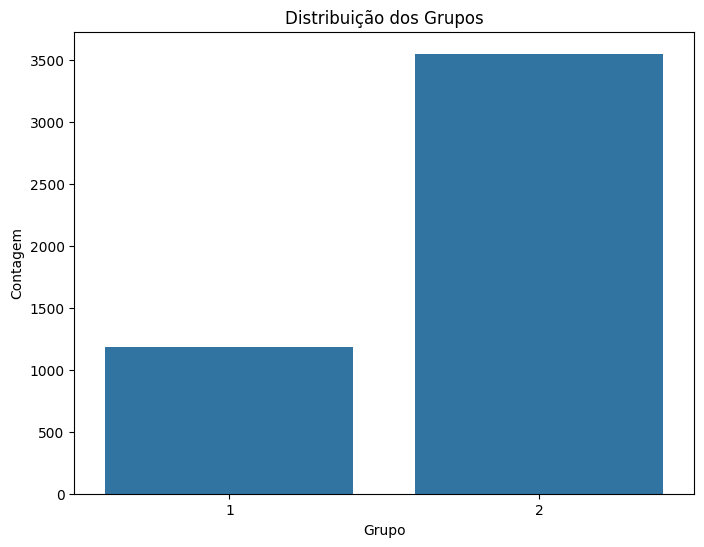

In [ ]:
# Determinar o limite entre ativos altos e baixos
limite_ativos = df['totalAtivo'].quantile(0.75)  # Por exemplo, podemos usar o quartil 3 (75º percentil) como limite

# Criar uma nova coluna 'grupo' com base no totalAtivo
df['grupo'] = 1  # Inicialmente, todos são atribuídos ao grupo 1
df.loc[df['totalAtivo'] <= limite_ativos, 'grupo'] = 2  # Os que são menores ou iguais ao limite são atribuídos ao grupo 2

# Visualizar a distribuição dos grupos
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='grupo')
plt.title('Distribuição dos Grupos')
plt.xlabel('Grupo')
plt.ylabel('Contagem')
plt.show()


In [ ]:
X = df_filtrado.drop(columns=[""])
y = df_filtrado[""]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

# Padronização dos dados
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia do modelo Random Forest: {:.2f}".format(accuracy))

Acurácia do modelo Random Forest: 0.79


In [ ]:
gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

In [ ]:
gbm.fit(X_train, y_train)

In [ ]:
y_pred = gbm.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia do modelo Gradient Boosting: {:.2f}".format(accuracy))

In [ ]:
import numpy as np
sum(np.isnan('definicaoRisco'))

# ***EDUARDO***

In [2]:
# Ignorar warnings
import warnings
warnings.filterwarnings("ignore")

# Bibliotecas para uso e visualização de dados
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Import para divisão dos dados de treino e teste
from sklearn.model_selection import train_test_split

# Imports para preparação de dados
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


# Import de métricas para avaliação dos modelos
from sklearn.metrics import accuracy_score

In [3]:
import pandas as pd
path = "/content/solicitacoescredito.csv"
pd.set_option('display.max_columns', None)
df = pd.read_csv('/content/solicitacoescredito.csv')

df.head(20)


,numero_solicitacao,razaoSocial,nomeFantasia,cnpjSemTraco,maiorAtraso,margemBrutaAcumulada,percentualProtestos,primeiraCompra,prazoMedioRecebimentoVendas,titulosEmAberto,valorSolicitado,status,definicaoRisco,diferencaPercentualRisco,percentualRisco,dashboardCorrelacao,valorAprovado,dataAprovadoEmComite,periodoBalanco,ativoCirculante,passivoCirculante,totalAtivo,totalPatrimonioLiquido,endividamento,duplicatasAReceber,estoque,faturamentoBruto,margemBruta,periodoDemonstrativoEmMeses,custos,anoFundacao,intervaloFundacao,capitalSocial,restricoes,empresa_MeEppMei,scorePontualidade,limiteEmpresaAnaliseCredito,dataAprovadoNivelAnalista
0,1,James Richardson-Patel,Alexandra Williams,KEBE17609492220843,0,0.252448,0.0,2015-12-10T00:00:00,0,0.00,50000.0,AprovadoAnalista,De 11 a 30 % - Baixo,0.716981,0.283019,0.000000e+00,50000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1766880.0,0.0,12.0,0.0,2003.0,Acima de 17 anos,90000.0,False,True,1.000000,43200.0,2020-02-03T20:57:33
1,2,Dr. Geoffrey Walsh,Mr. Darren Arnold,JRBK88908250677300,0,0.000000,NaN,2019-06-12T17:28:31,0,0.00,10000.0,DocumentacaoReprovada,De 0 a 10 % - Muito Baixo,1.000000,0.000000,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
2,3,Joanna Hudson,Dr. David Rees,GCVQ28531614261293,4,0.624777,0.0,2019-11-27T00:00:00,0,0.00,20000.0,AprovadoAnalista,De 11 a 30 % - Baixo,0.716981,0.283019,0.000000e+00,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2814940.0,0.0,7.0,0.0,2014.0,De 6 a 10 anos,20000.0,False,True,1.000000,4320.0,2020-02-04T16:40:49
3,4,Gordon Jones-Hopkins,Sara Reid-Robson,KJND32266018316396,20,0.000000,NaN,2017-02-13T17:20:27,0,0.00,25000.0,AprovadoAnalista,De 51 a 80 % - Alto,0.396226,0.603774,4.858111e-01,15000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1285274.0,0.0,12.0,0.0,2013.0,De 6 a 10 anos,30000.0,False,True,0.000000,5920.0,2020-02-04T16:37:52
4,5,Nigel Lee,Dr. Stanley Duncan,CGQN15826802440348,20,0.454088,0.0,2010-07-13T00:00:00,20,1486.95,50000.0,AprovadoAnalista,De 11 a 30 % - Baixo,0.830189,0.169811,0.000000e+00,50000.0,NaN,2019-09-30T00:00:00,14758917.0,12149031.0,25793410.0,14544378.0,3039112.0,11797928.0,3047791.0,40779757.0,81459809.0,9.0,40680051.0,2002.0,Acima de 17 anos,75000.0,False,False,1.000000,89000.0,2020-02-04T15:06:28
5,6,Liam Jackson,Gerard Gordon,KAYS53232027306925,0,0.000000,NaN,2019-06-28T10:25:57,0,0.00,25000.0,AprovadoAnalista,De 31 a 50 % - Médio,0.622642,0.377358,0.000000e+00,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,918476.0,0.0,12.0,0.0,2011.0,De 6 a 10 anos,15000.0,False,True,0.000000,38400.0,2020-02-04T15:10:46
6,7,Alexander Baker-Wells,Dr. Caroline Ali,PYOL43118620147076,16,0.000000,NaN,2011-03-02T11:27:13,0,0.00,100000.0,AprovadoAnalista,De 31 a 50 % - Médio,0.584906,0.415094,-9.975171e-01,80000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,239016696.0,-7540544.0,12.0,156394112.0,1982.0,Acima de 17 anos,30515674.0,True,False,0.000000,18132588.0,2020-02-05T14:31:22
7,8,Jean Berry,Gregory Gould,NLUX93496216176463,4,0.350175,0.0,2007-07-02T00:00:00,102,208980.00,300000.0,AprovadoAnalista,De 0 a 10 % - Muito Baixo,0.943396,0.056604,0.000000e+00,300000.0,NaN,2019-09-30T03:00:00,17801610.0,2538069.0,19415777.0,7519758.0,0.0,3742963.0,11902384.0,11958227.0,9357949.0,9.0,0.0,2000.0,Acima de 17 anos,120000.0,False,False,1.000000,768233.0,2020-02-05T20:05:40
8,9,Elliot Stephenson,Adrian Graham,LOVL82962402474134,43,0.245818,0.0,2006-07-10T00:00:00,27,6432.00,400000.0,AprovadoAnalista,De 11 a 30 % - Baixo,0.886792,0.113208,0.000000e+00,400000.0,NaN,2018-12-31T02:00:00,36827690.0,13843198.0,39455945.0,25612746.0,0.0,15980275.0,11420388.0,72479551.0,6233236.0,12.0,-49267738.0,2000.0,Acima de 17 anos,1000000.0,False,False,1.000000,6910219.0,2020-02-05T20:07:07
9,10,Dr. Dale Dawson,Caroline Hale,NXKJ36775578171965,24,0.000012,0.0,2011-02-24T00:00:00,0,22733.33,50000.0,DocumentacaoReprovada,De 0 a 10 % - Muito Baixo,1.000000,0.000000,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [4]:
df = pd.read_csv(path)
df_sub = df[["faturamentoBruto", "duplicatasAReceber", "estoque", "totalAtivo", "passivoCirculante", "ativoCirculante", "empresa_MeEppMei", "margemBrutaAcumulada"]]


In [ ]:
#correlation_matrix = df_filtrado.corr()
correlation_matrix = df_sub.corr()

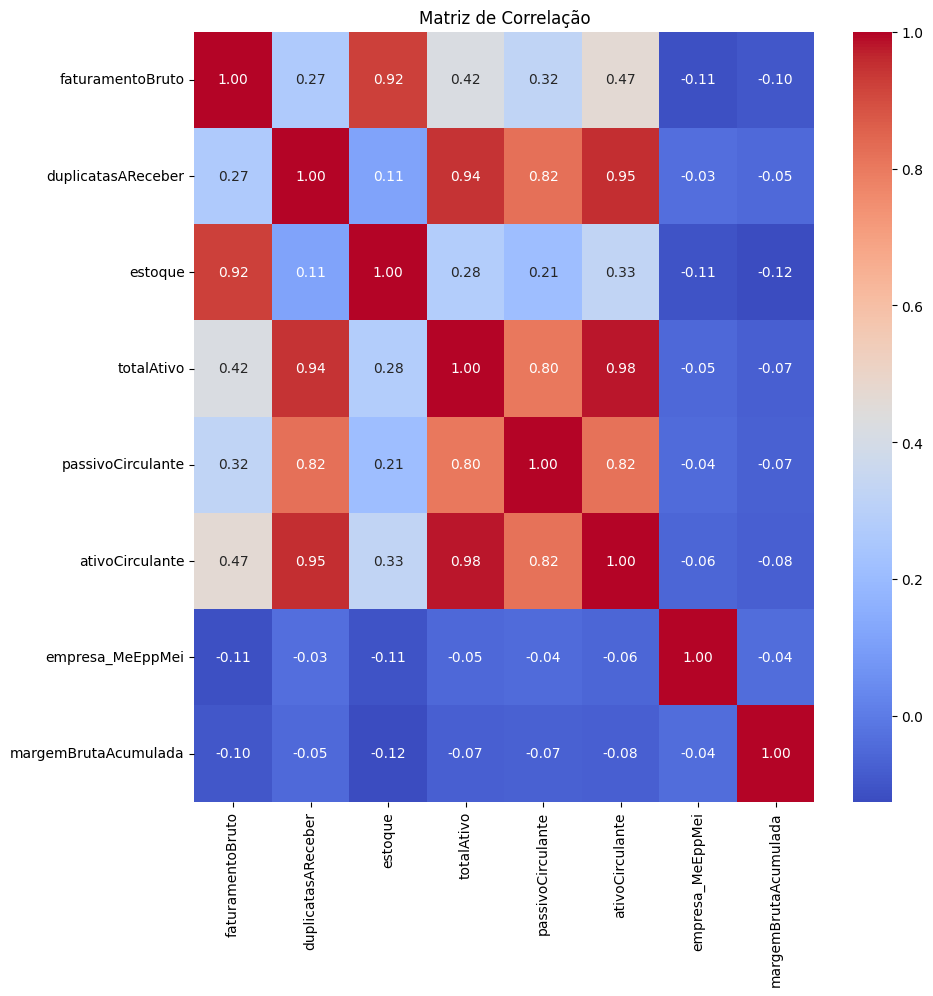

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()

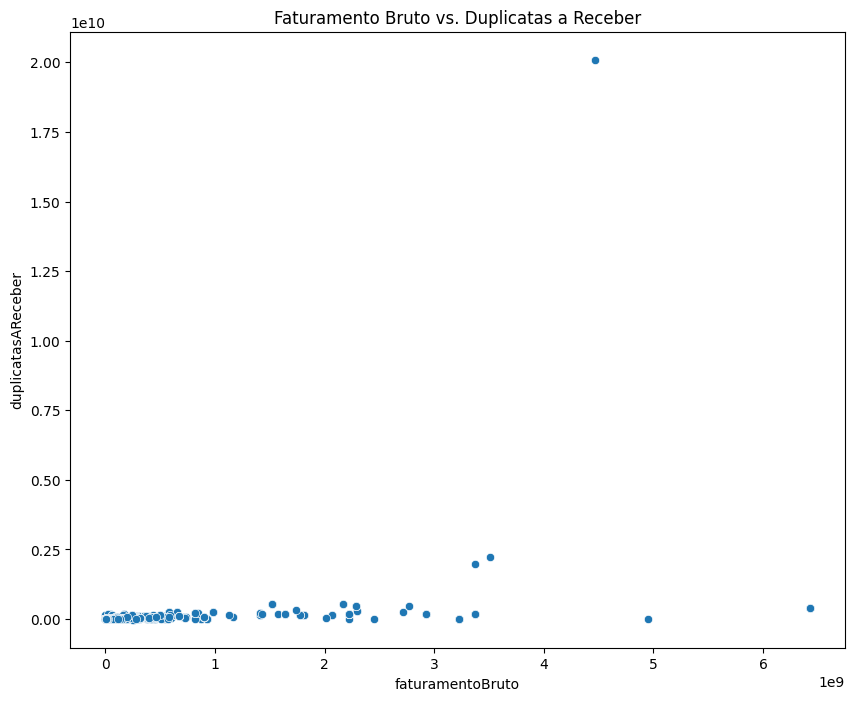

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='faturamentoBruto', y='duplicatasAReceber')
plt.title('Faturamento Bruto vs. Duplicatas a Receber')
plt.show()

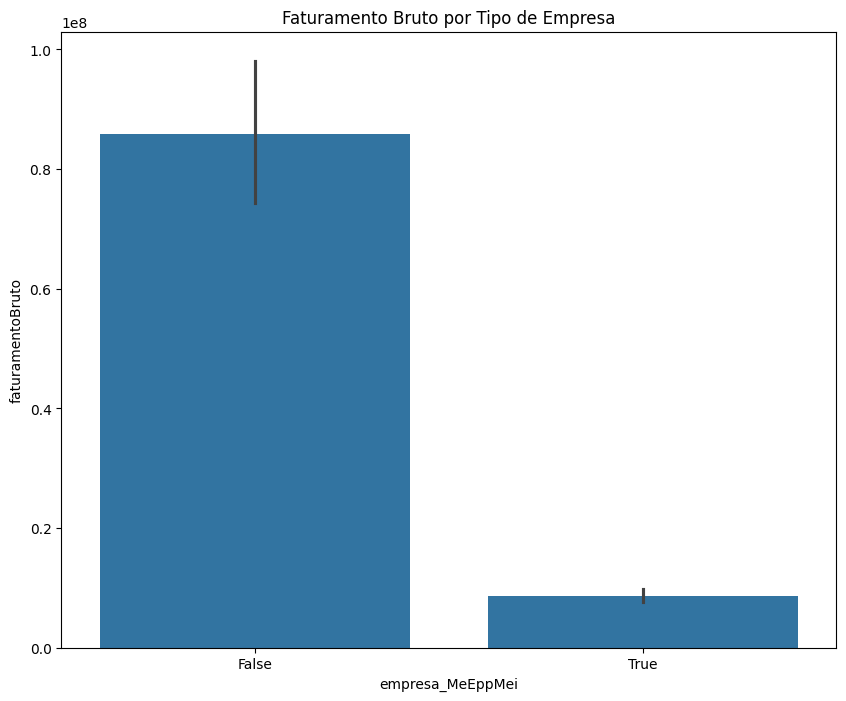

In [ ]:
plt.figure(figsize=(10, 8))
sns.barplot(data=df, x='empresa_MeEppMei', y='faturamentoBruto')
plt.title('Faturamento Bruto por Tipo de Empresa')
plt.show()

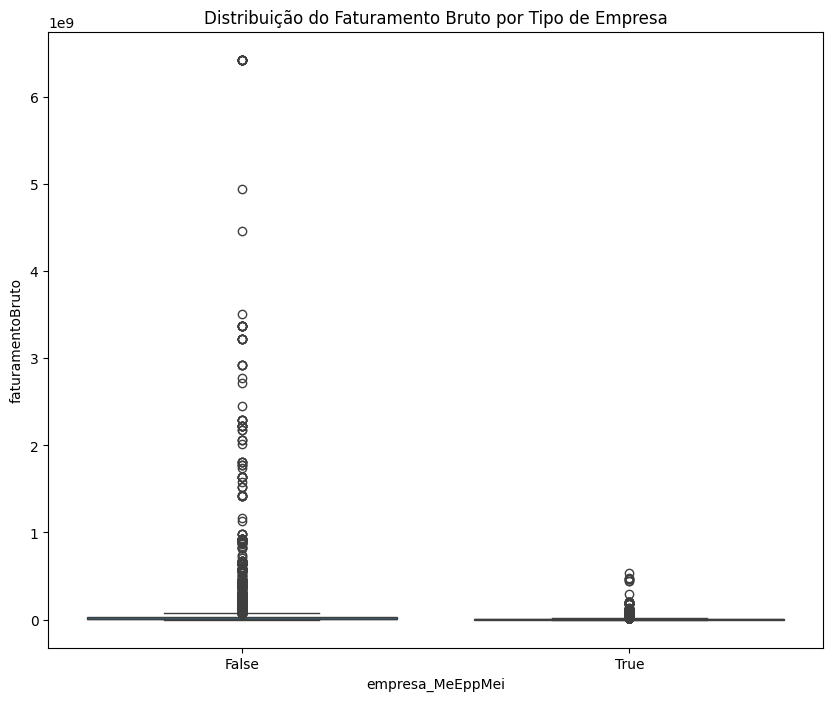

In [ ]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=df, x='empresa_MeEppMei', y='faturamentoBruto')
plt.title('Distribuição do Faturamento Bruto por Tipo de Empresa')
plt.show()

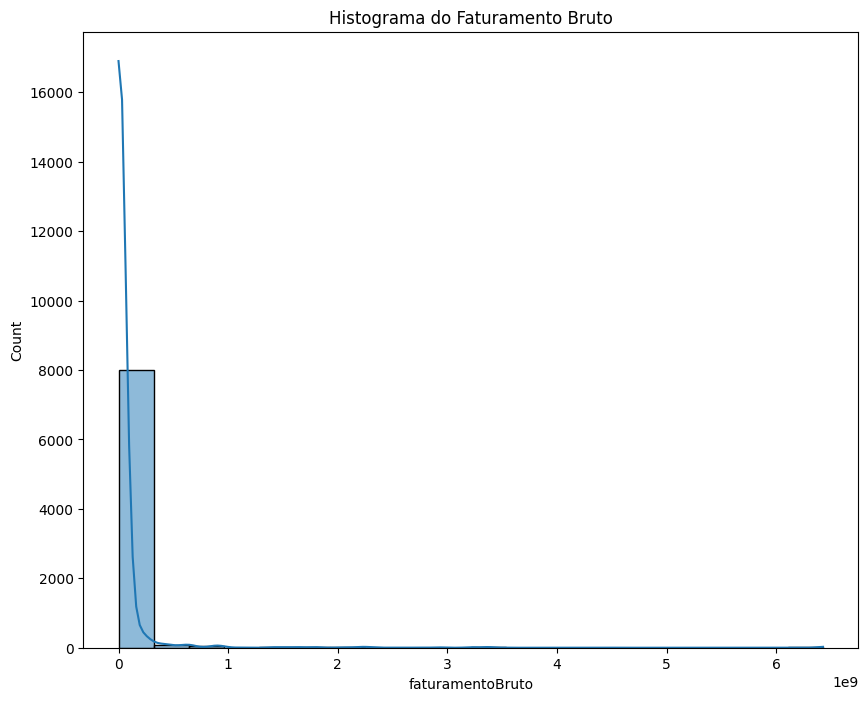

In [ ]:
plt.figure(figsize=(10, 8))
sns.histplot(data=df, x='faturamentoBruto', bins=20, kde=True)
plt.title('Histograma do Faturamento Bruto')
plt.show()

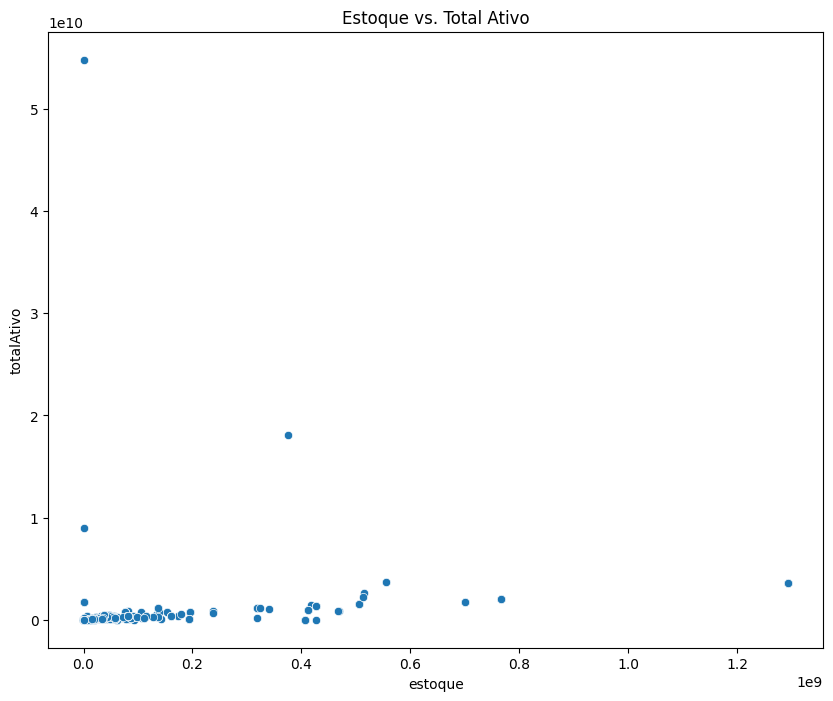

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='estoque', y='totalAtivo')
plt.title('Estoque vs. Total Ativo')
plt.show()


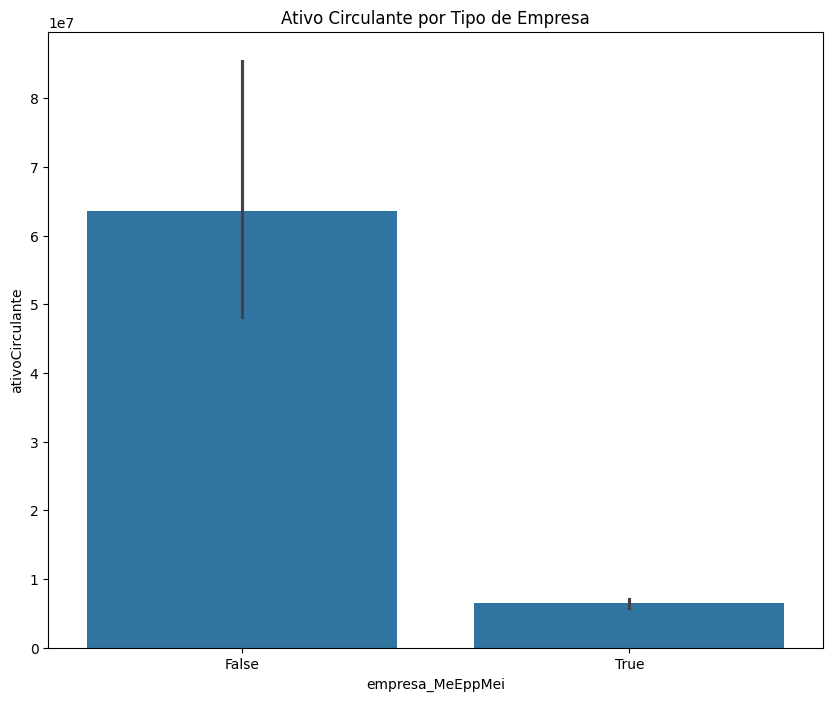

In [ ]:
plt.figure(figsize=(10, 8))
sns.barplot(data=df, x='empresa_MeEppMei', y='ativoCirculante')
plt.title('Ativo Circulante por Tipo de Empresa')
plt.show()


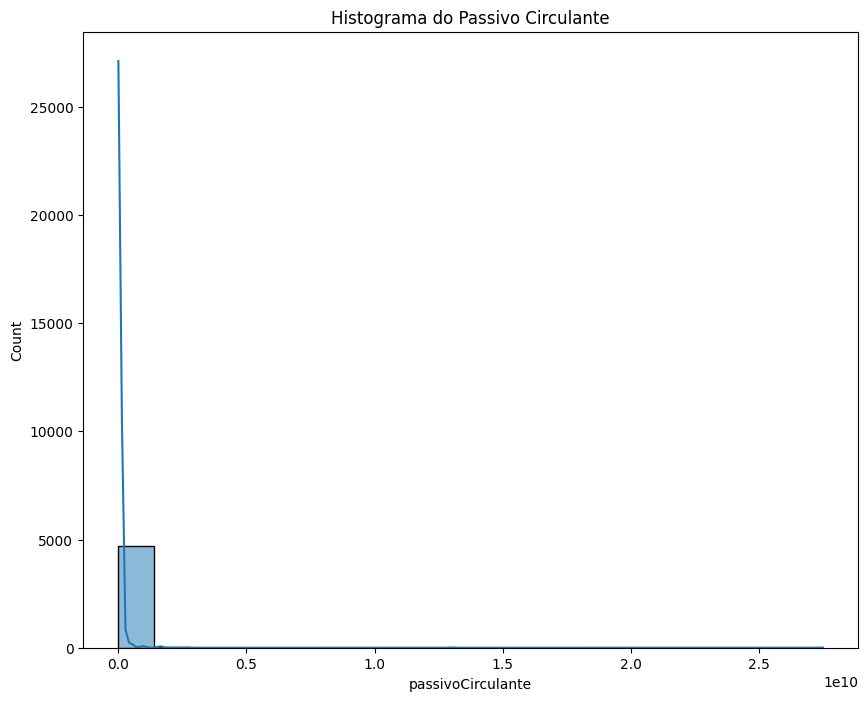

In [ ]:
plt.figure(figsize=(10, 8))
sns.histplot(data=df, x='passivoCirculante', bins=20, kde=True)
plt.title('Histograma do Passivo Circulante')
plt.show()


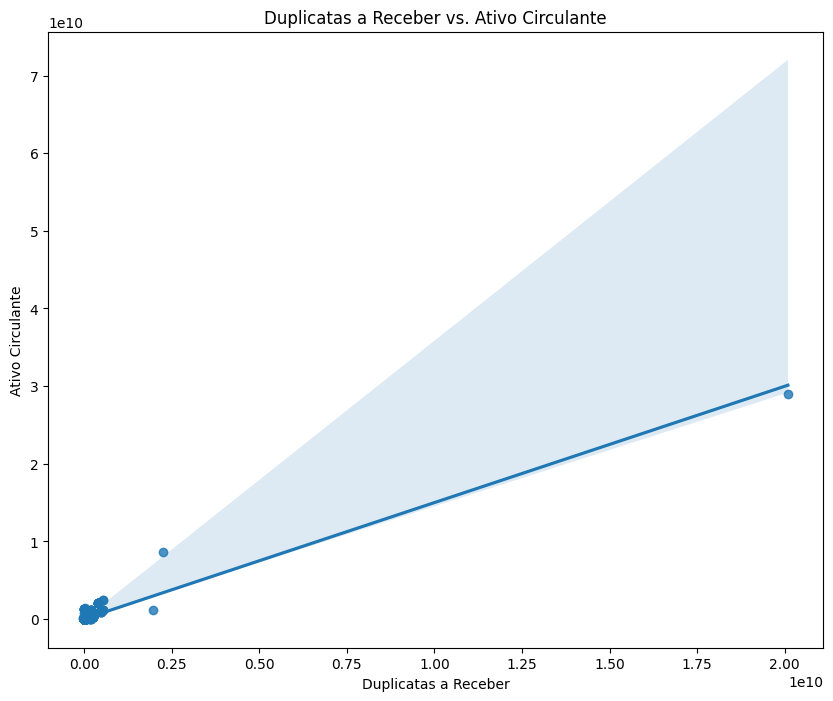

In [ ]:
plt.figure(figsize=(10, 8))
sns.regplot(data=df, x='duplicatasAReceber', y='ativoCirculante')
plt.title('Duplicatas a Receber vs. Ativo Circulante')
plt.xlabel('Duplicatas a Receber')
plt.ylabel('Ativo Circulante')
plt.show()


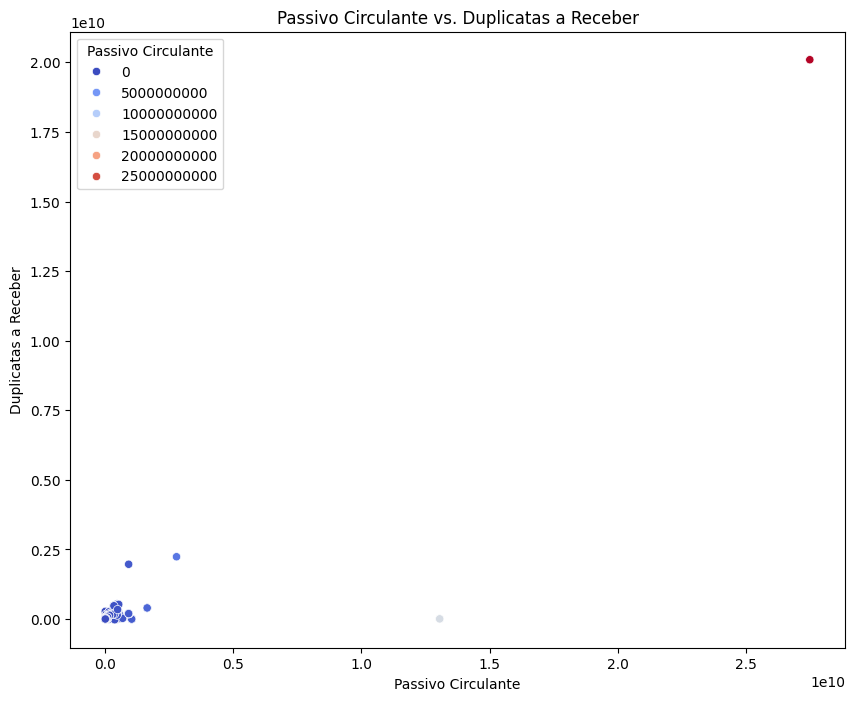

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='passivoCirculante', y='duplicatasAReceber', hue='passivoCirculante', palette='coolwarm')
plt.title('Passivo Circulante vs. Duplicatas a Receber')
plt.xlabel('Passivo Circulante')
plt.ylabel('Duplicatas a Receber')
plt.legend(title='Passivo Circulante')
plt.show()


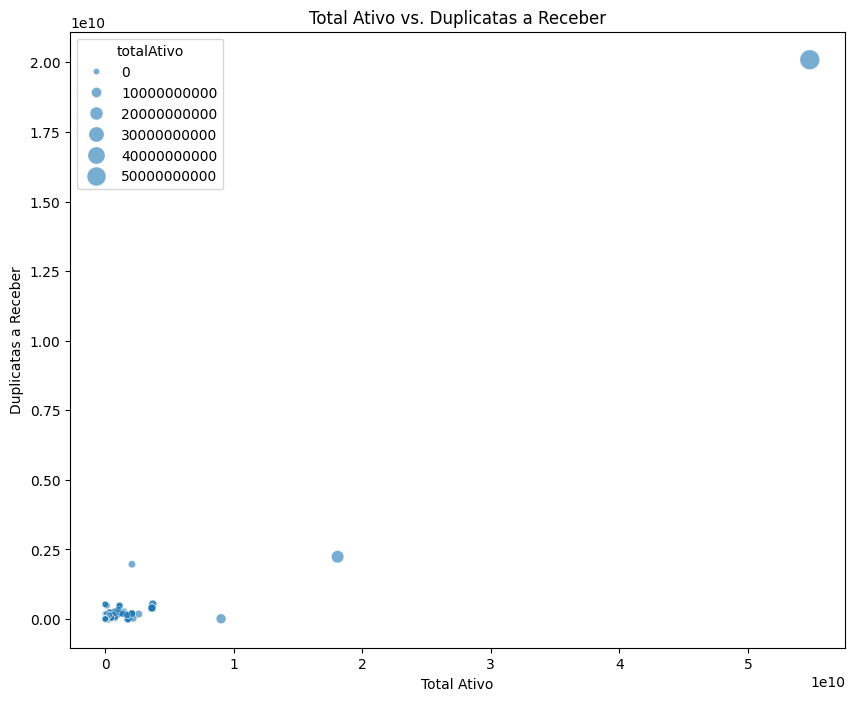

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='totalAtivo', y='duplicatasAReceber', size='totalAtivo', sizes=(20, 200), alpha=0.6)
plt.title('Total Ativo vs. Duplicatas a Receber')
plt.xlabel('Total Ativo')
plt.ylabel('Duplicatas a Receber')
plt.show()


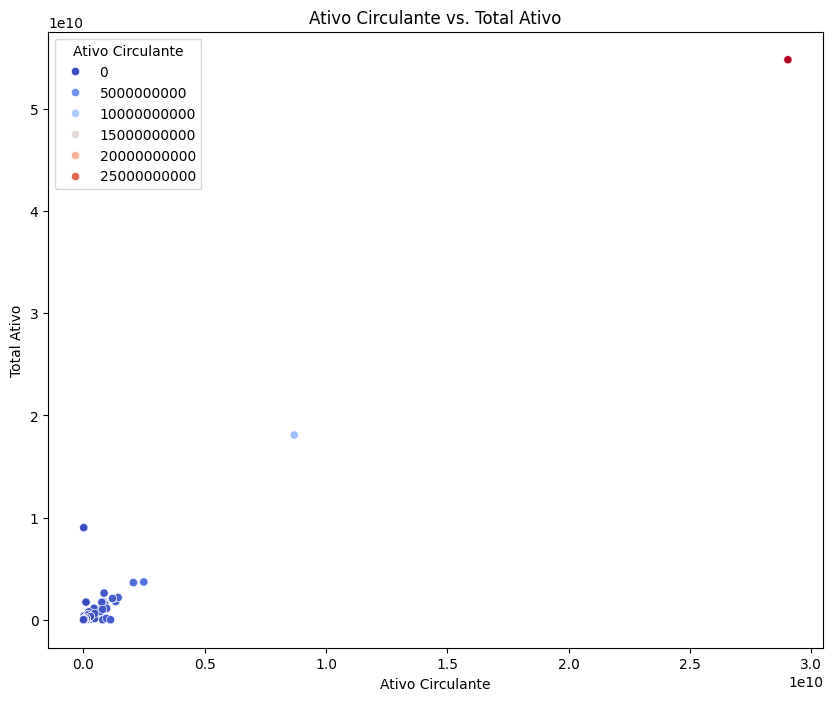

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='ativoCirculante', y='totalAtivo', hue='ativoCirculante', palette='coolwarm')
plt.title('Ativo Circulante vs. Total Ativo')
plt.xlabel('Ativo Circulante')
plt.ylabel('Total Ativo')
plt.legend(title='Ativo Circulante')
plt.show()


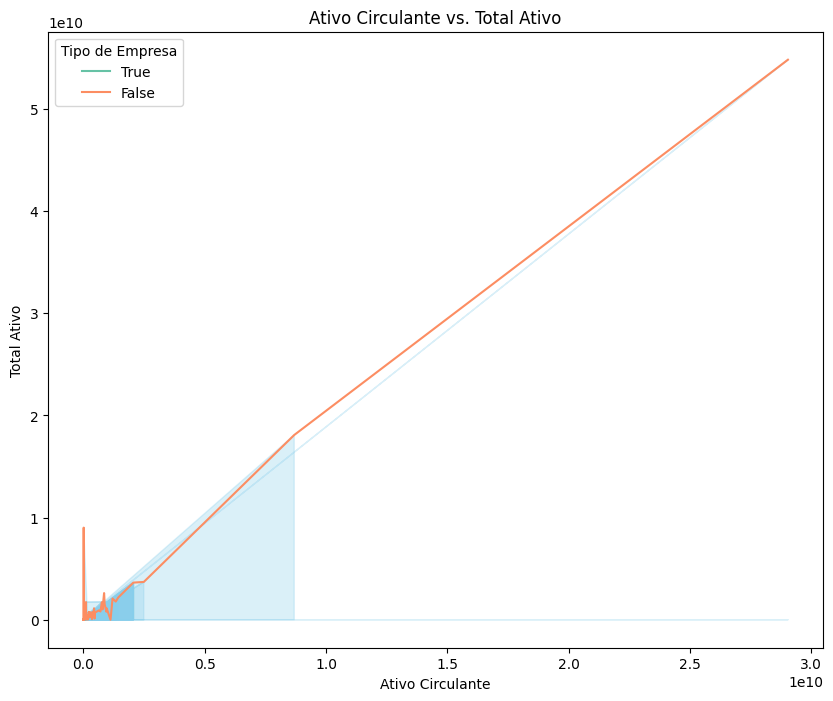

In [ ]:
plt.figure(figsize=(10, 8))
sns.lineplot(data=df, x='ativoCirculante', y='totalAtivo', hue='empresa_MeEppMei', palette='Set2', ci=None)
plt.fill_between(df['ativoCirculante'], df['totalAtivo'], color='skyblue', alpha=0.3)
plt.title('Ativo Circulante vs. Total Ativo')
plt.xlabel('Ativo Circulante')
plt.ylabel('Total Ativo')
plt.legend(title='Tipo de Empresa')
plt.show()


<Figure size 1000x1000 with 0 Axes>

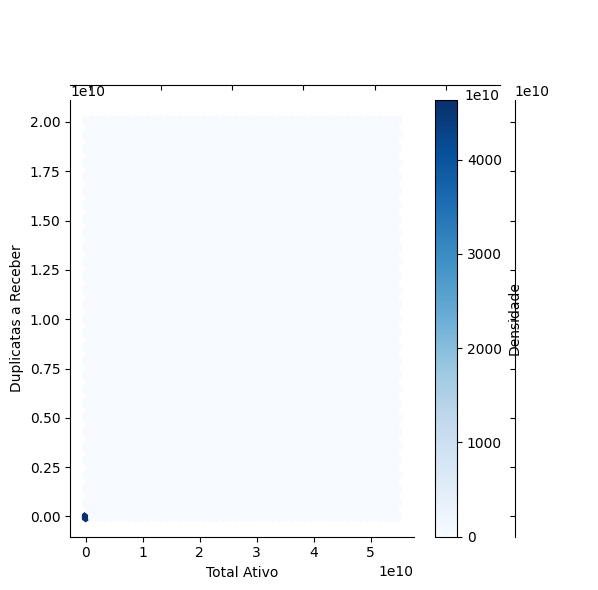

In [ ]:
plt.figure(figsize=(10, 10))
sns.jointplot(data=df, x='totalAtivo', y='duplicatasAReceber', kind='hex', cmap='Blues')
plt.colorbar(label='Densidade')
plt.xlabel('Total Ativo')
plt.ylabel('Duplicatas a Receber')
plt.show()


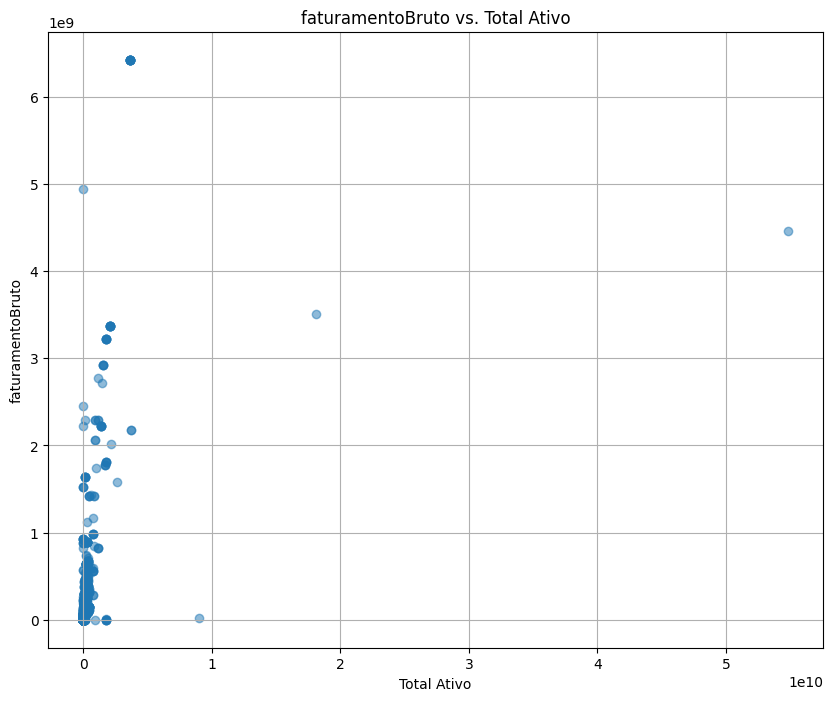

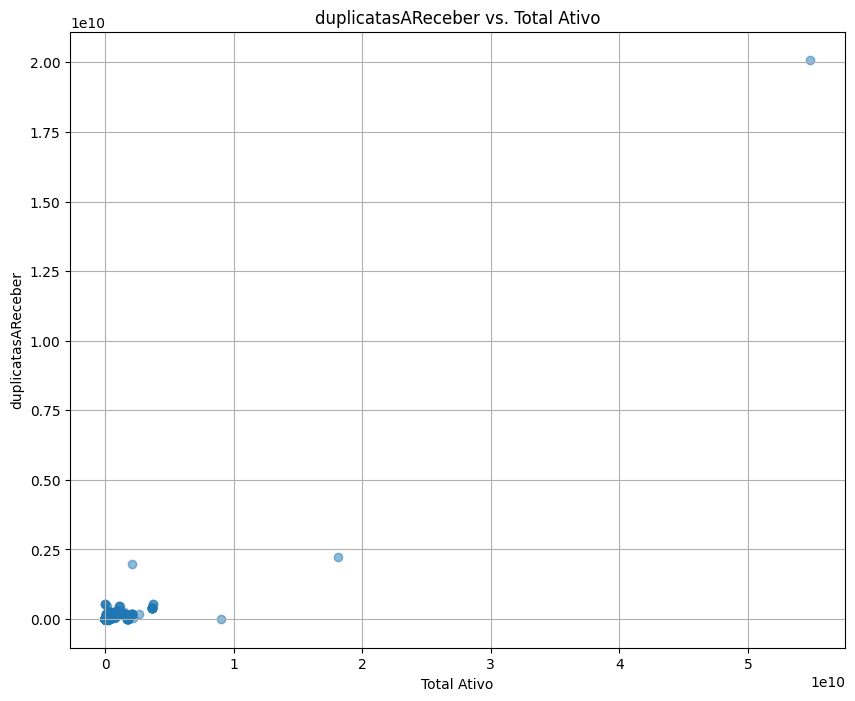

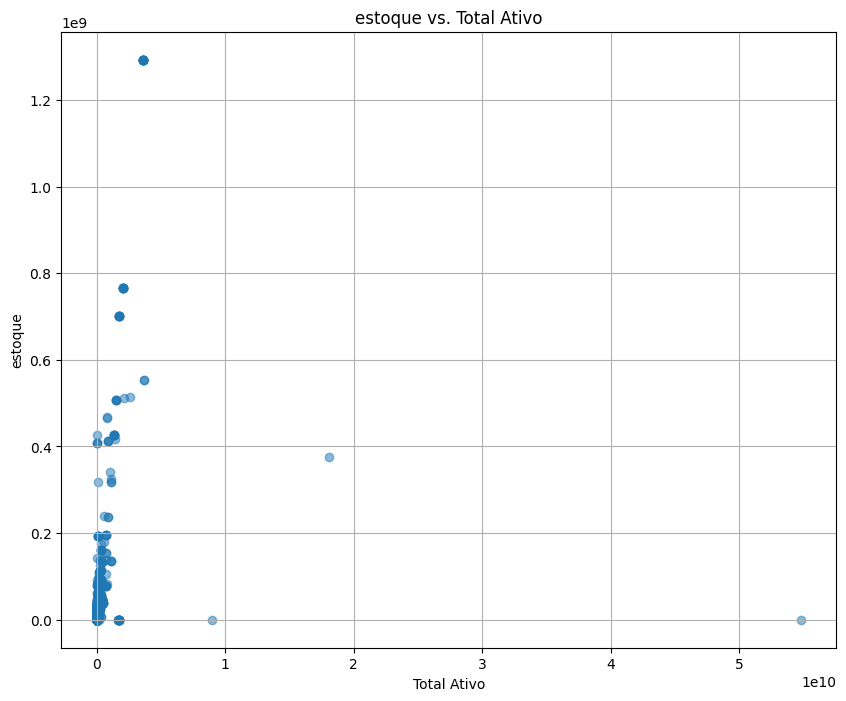

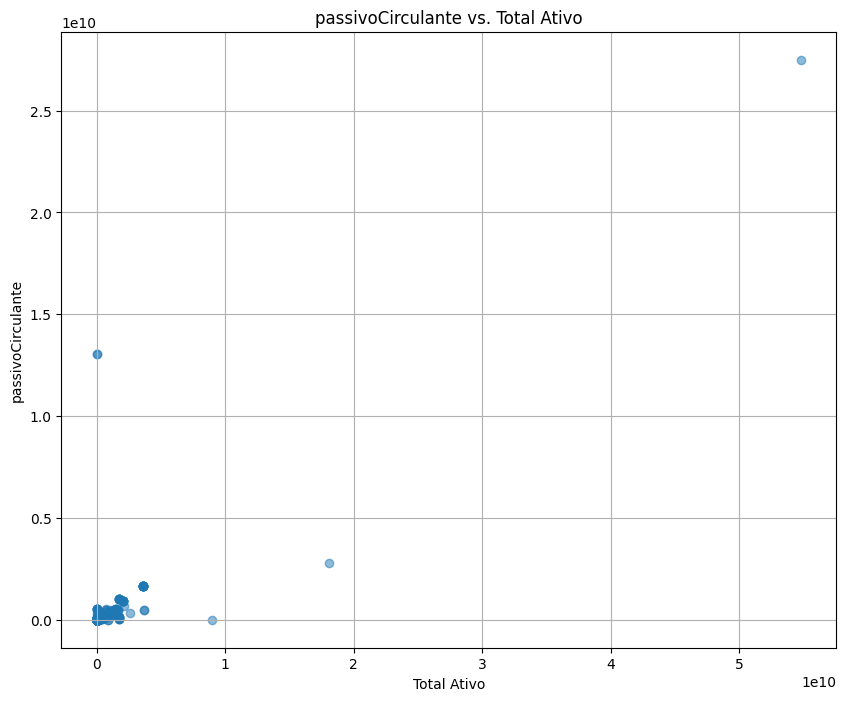

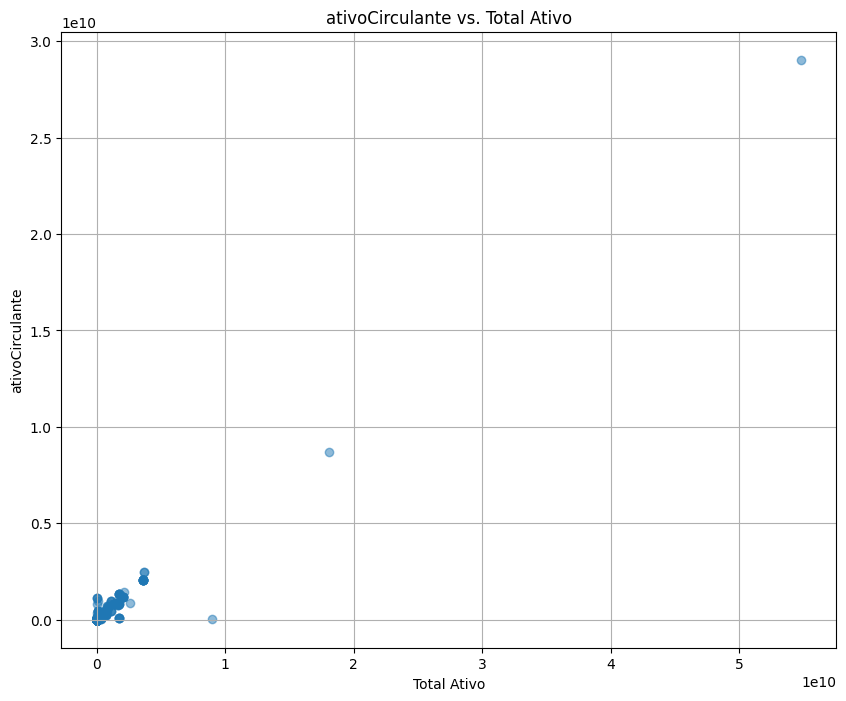

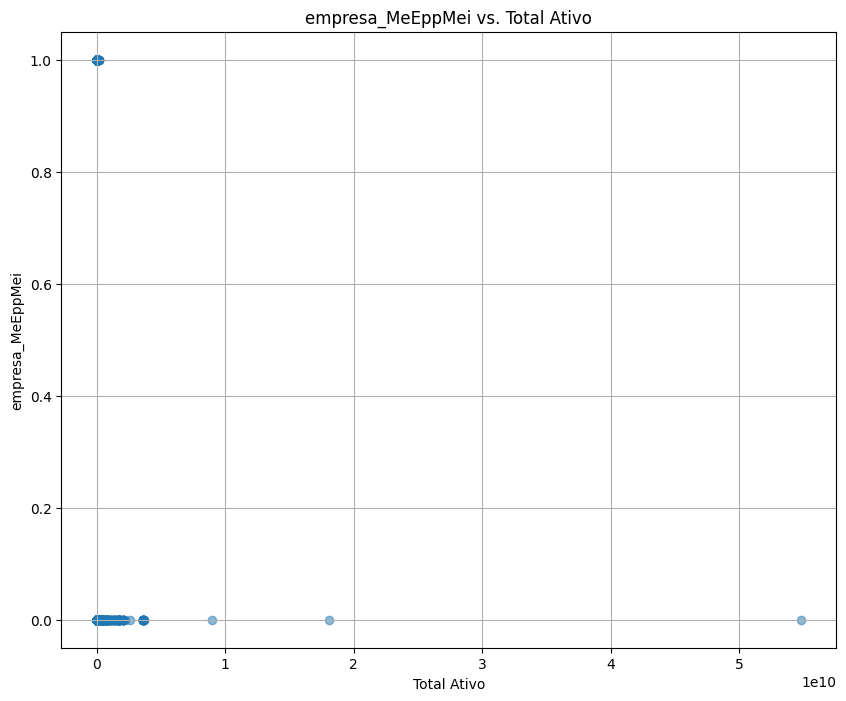

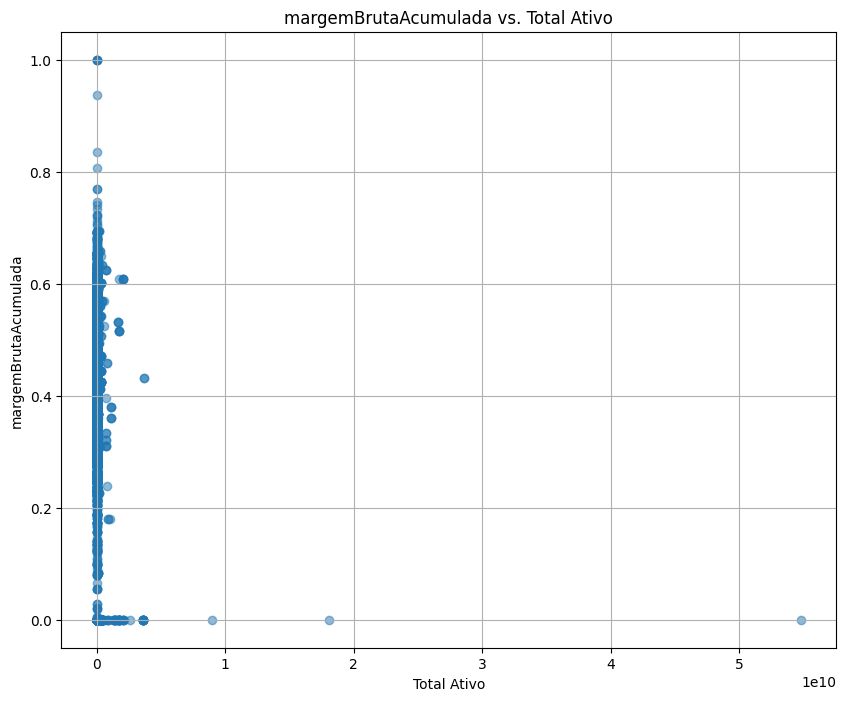

In [7]:
import matplotlib.pyplot as plt

colunas = ["faturamentoBruto", "duplicatasAReceber", "estoque", "passivoCirculante", "ativoCirculante", "empresa_MeEppMei", "margemBrutaAcumulada"]

for coluna in colunas:
    plt.figure(figsize=(10, 8))
    plt.scatter(df_sub['totalAtivo'], df_sub[coluna], alpha=0.5)
    plt.title(f'{coluna} vs. Total Ativo')
    plt.xlabel('Total Ativo')
    plt.ylabel(coluna)
    plt.grid(True)
    plt.show()


count    4.733000e+03
mean     7.073623e+07
std      8.878891e+08
min     -1.700000e+01
25%      1.049740e+06
50%      4.637565e+06
75%      1.916744e+07
max      5.482350e+10
Name: totalAtivo, dtype: float64


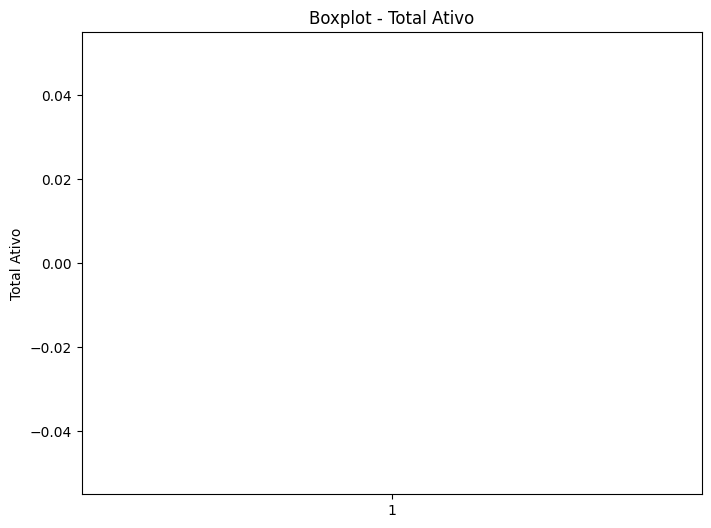

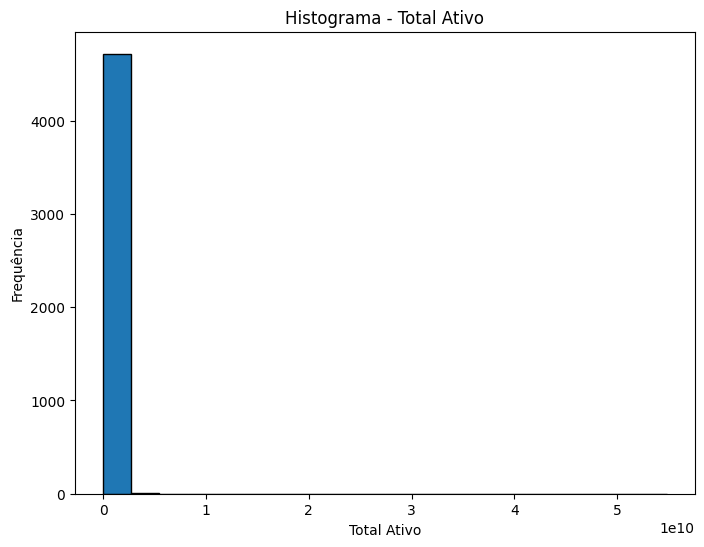

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Seu DataFrame
# Supondo que seu DataFrame seja chamado de df_sub
# Suponha que você deseja analisar a coluna 'totalAtivo'

# Calcule estatísticas descritivas
stats = df_sub['totalAtivo'].describe()
print(stats)

# Plote um boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(df_sub['totalAtivo'])
plt.title('Boxplot - Total Ativo')
plt.ylabel('Total Ativo')
plt.show()

# Plote um histograma
plt.figure(figsize=(8, 6))
plt.hist(df_sub['totalAtivo'], bins=20, edgecolor='k')
plt.title('Histograma - Total Ativo')
plt.xlabel('Total Ativo')
plt.ylabel('Frequência')
plt.show()


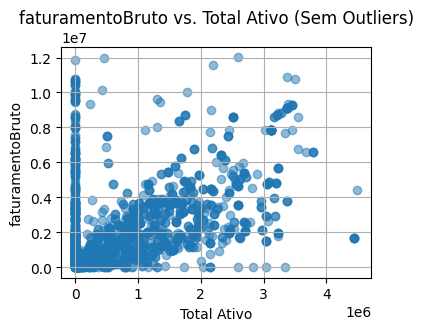

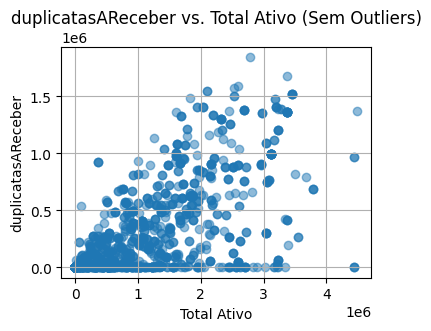

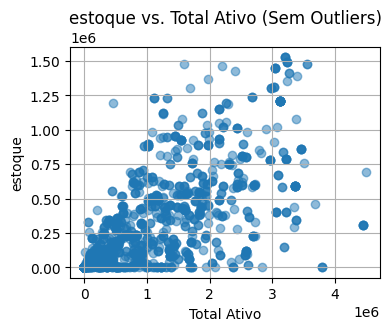

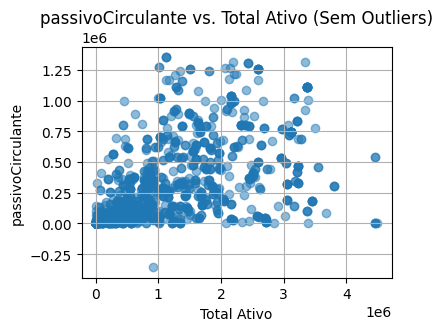

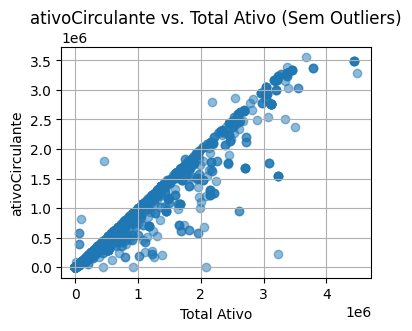

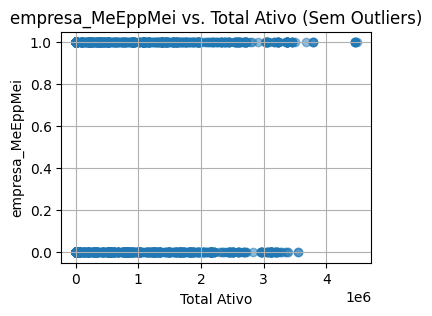

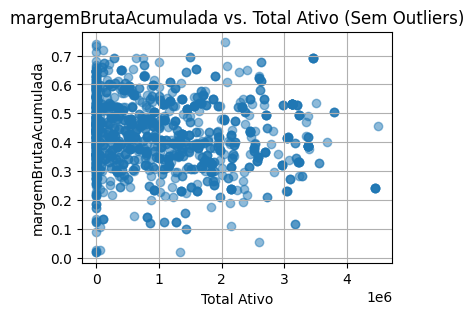

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Seu DataFrame
# Supondo que seu DataFrame seja chamado de df_sub
# Suponha que você deseja remover outliers em relação à coluna 'totalAtivo'

# Definindo uma função para remover outliers
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Removendo outliers
for coluna in df_sub.columns:
    df_sub = remove_outliers(df_sub, coluna)

# Lista das colunas que você deseja plotar em relação a 'totalAtivo'
colunas = ["faturamentoBruto", "duplicatasAReceber", "estoque", "passivoCirculante", "ativoCirculante", "empresa_MeEppMei", "margemBrutaAcumulada"]

# Criando os gráficos de dispersão sem outliers
for coluna in colunas:
    plt.figure(figsize=(4, 3))
    plt.scatter(df_sub['totalAtivo'], df_sub[coluna], alpha=0.5)
    plt.title(f'{coluna} vs. Total Ativo (Sem Outliers)')
    plt.xlabel('Total Ativo')
    plt.ylabel(coluna)
    plt.grid(True)
    plt.show()


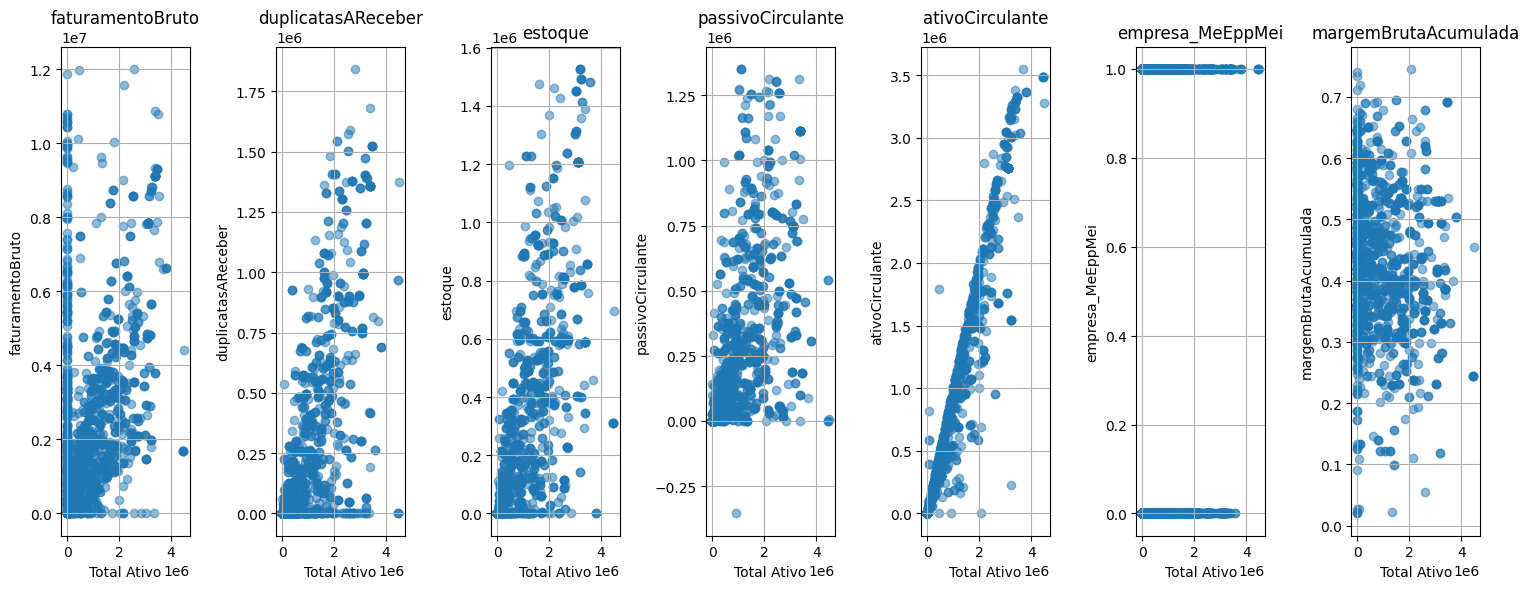

In [12]:
import matplotlib.pyplot as plt

# Lista das colunas que você deseja plotar em relação a 'totalAtivo'
colunas = ["faturamentoBruto", "duplicatasAReceber", "estoque", "passivoCirculante", "ativoCirculante", "empresa_MeEppMei", "margemBrutaAcumulada"]

# Criando os gráficos de dispersão lado a lado
fig, axes = plt.subplots(nrows=1, ncols=len(colunas), figsize=(15, 6))

for i, coluna in enumerate(colunas):
    axes[i].scatter(df_sub['totalAtivo'], df_sub[coluna], alpha=0.5)
    axes[i].set_title(f'{coluna}')
    axes[i].set_xlabel('Total Ativo')
    axes[i].set_ylabel(coluna)
    axes[i].grid(True)

plt.tight_layout()
plt.show()
